In [ ]:
# List out the installed libraries and packages on the Google Colab instance
# !pip3 freeze

In [ ]:
# Install Conda
!pip3 install -q condacolab
!pip3 install lux-api
import condacolab
condacolab.install()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185620 sha256=ac68c47e24fc51c2d67183b0c6669b4f299c799575082b9f3c638dafcb40cb0b
  Stored in directory: /root/.cache/pip/wheels/bd/05/a4/441d23d1cece85d6cd3cec43b38896e88a729e8048138825bd
  Created wheel for lux-widget: filename=lux_widget-0.1.11-py3-non

In [ ]:
# Check Conda installation status
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [5]:
!conda install -c conda-forge optuna --quiet
!conda install -c conda-forge optuna-dashboard --quiet

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
!pip3 install ReliefF --quiet
!pip3 install mrmr_selection --quiet
!pip3 install bottleneck --quiet

In [7]:
import lux
import optuna
from google.colab import output
output.enable_custom_widget_manager()

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

!pip3 install -U -q PyDrive --quiet
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Load the dataset
downloaded = drive.CreateFile({'id':'1WXJ_bCUi3ZjsgJutfTEWWy7DIZuLP49m'}) 
downloaded.GetContentFile('patients.csv')  

Mounted at /content/drive


In [8]:
import warnings
warnings.filterwarnings("ignore", module="lux.executor.PandasExecutor")

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 2000)

# Problem Analysis and Definition
**Description**:
1. 
2.
3.

# Data Exploration and Preprocessing
We will perform some visualization and display the statistics to see if there are some apparent patterns and get some initial ideas for the dataset.

In [9]:
df_raw = pd.read_csv('patients.csv')
df_raw.shape

(1000, 26)

In [10]:
df_raw.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
df_raw.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [12]:
df_raw.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


In [13]:
df_raw.describe()

/usr/local/lib/python3.9/dist-packages/IPython/core/formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

/usr/local/lib/python3.9/dist-packages/lux/core/frame.py:632: UserWarning:Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/lux/core/frame.py", line 594, in _ipython_display_
    self.maintain_recs()
  File "/usr/local/lib/python3.9/dist-packages/lux/core/frame.py", line 436, in maintain_recs
    custom_action_collection = custom_actions(rec_df)
  File "/usr/local/lib/python3.9/dist-packages/lux/action/custom.py", line 74, in custom_actions
    recommendation = lux.config.actions[action_name].action(ldf, args)
  File "/usr/local/lib/python3.9/dist-packages/lux/action/univariate.py", line 95, in univariate
    vlist = VisList(intent, ldf)
  File "/usr/local/lib/python3.9/dist-packages/lux/vis/VisL

index          Age       Gender  Air Pollution  Alcohol use   
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000  \
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease   
count   1000.000000           1000.000000   1000.000000           1000.000000  \
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet      Obesity      Smoking  Passive Smoker   Chest Pain   
count    1000.000000  1000.000000  1000.000000     1000.000000  1000.000000  \
mean        4.491000     4.465000     3.948000        4.195000     4.438000   
std         2.135528     2.124921     2.495902        2.311778     2.280209   
min         1.000000     1.000000     1.000000        1.000000     1.000000   
25%         2.000000     3.000000     2.000000        2.000000     2.000000   
50%         4.000000     4.000000     3.000000        4.000000     4.000000   
75%         7.000000     7.000000     7.000000        7.000000     7.000000   
max         7.000000     7.000000     8.000000        8.000000     9.000000   

       Coughing of Blood      Fatigue  Weight Loss  Shortness of Breath   
count        1000.000000  1000.000000  1000.000000          1000.000000  \
mean            4.859000     3.856000     3.855000             4.240000   
std             2.427965     2.244616     2.206546             2.285087   
min             1.000000     1.000000     1.000000             1.000000   
25%             3.000000     2.000000     2.000000             2.000000   
50%             4.000000     3.000000     3.000000             4.000000   
75%             7.000000     5.000000     6.000000             6.000000   
max             9.000000     9.000000     8.000000             9.000000   

          Wheezing  Swallowing Difficulty  Clubbing of Finger Nails   
count  1000.000000            1000.000000               1000.000000  \
mean      3.777000               3.746000                  3.923000   
std       2.041921               2.270383                  2.388048   
min       1.000000               1.000000                  1.000000   
25%       2.000000               2.000000                  2.000000   
50%       4.000000               4.000000                  4.000000   
75%       5.000000               5.000000                  5.000000   
max       8.000000               8.000000                  9.000000   

       Frequent Cold    Dry Cough      Snoring  
count    1000.000000  1000.000000  1000.000000  
mean        3.536000     3.853000     2.926000  
std         1.832502     2.039007     1.474686  
min         1.000000     1.000000     1.000000  
25%         2.000000     2.000000     2.000000  
50%         3.000000     4.000000     3.000000  
75%         5.000000     6.000000     4.000000  
max         7.000000     7.000000     7.000000

In [14]:
df = df_raw.drop(['index', 'Patient Id'], axis=1)

In [15]:
df.shape

(1000, 24)

In [16]:
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [17]:
# Rename columns
df = df.rename(columns={'Air Pollution':'Air_Pollution',
                   'Alcohol use':'Alcohol_Use',
                   'Dust Allergy':'Dust_Allergy',
                   'OccuPational Hazards':'OccuPational_Hazards',
                   'Genetic Risk':'Genetic_Risk',
                   'chronic Lung Disease':'Chronic_Lung_Disease',
                   'Balanced Diet':'Balanced_Diet',
                   'Passive Smoker':'Passive_Smoker',
                   'Chest Pain':'Chest_Pain',
                   'Coughing of Blood':'Coughing_Of_Blood',
                   'Weight Loss':'Weight_Loss',
                   'Shortness of Breath':'Shortness_Of_Breath',
                   'Swallowing Difficulty':'Swallowing_Difficulty',
                   'Clubbing of Finger Nails':'Clubbing_Of_Finger_Nails',
                   'Frequent Cold':'Frequent_Cold',
                   'Dry Cough':'Dry_Cough'
                   })

In [18]:
df.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
df.duplicated().sum()

848

In [20]:
df.loc[df.duplicated()]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
unique_rows = df.drop_duplicates()
unique_rows

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [22]:
if df["Level"].dtype == 'object':
    df["Level"] = df["Level"].map({'Low': 0, 'Medium': 1, 'High': 2})

if not all(df[col].dtype == 'int16' for col in df.columns):
    df = df.astype('int16')

From the above, we notice:

1. Some irrelevant columns like index and Patient ID have no practical meaning. -> Drop these columns.
2. All columns (features) are of int64 type except the last column (class label: Level) is of object type (string).
3. The Age feature has the most dynamic range among all these numerical features, ranging from 14 to 73 years old vs. from 1 to 6, and up to 9 for other features. -> Use equal width & frequency binning to reduce the value range, as some distance-based algorithms are sensitive to the scale and actual value of the data.
4. The Level target has three possible values: Low, Medium, and High. (Is it appropriate?) -> convert it to 0, 1, 2 as all algorithms can handle numerical value, and the difference implies the ordinal relationship between distinct values.
5. The Gender feature has two possible values, including 1 and 2. (Is it appropriate? What are the other alternatives to encode non-ordinal categorical data)
6. There is no missing value.
7. There are 152 unique rows (samples), other 848 rows are duplicates.
8. There are 1000 rows and 24 columns. -> small dataset, a common phenomenon in medical-related datasets due to factors including the sensitive nature of medical data, strict regulations, ethical considerations, and involvement of various stakeholders.

Label encoding vs. One-hot encoding?

1. Why should we consider performing label encoding for the target variable with binary outcomes? e.g., 0 for male, 1 for female; sufficient information
2. Some argue that one-hot encoding is redundant for binary variables as the variable itself is in a form similar to the one-hot encoded.
3. Imagine if there are many binary variables; one-hot encoding of them will drastically increase the feature dimension.
  - **Curse of Dimensionality**
  - **Time & Memory Complexity**
  - **Multi-Collinearity**
  - **Overfitting-prone**

In [23]:
df['Level'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

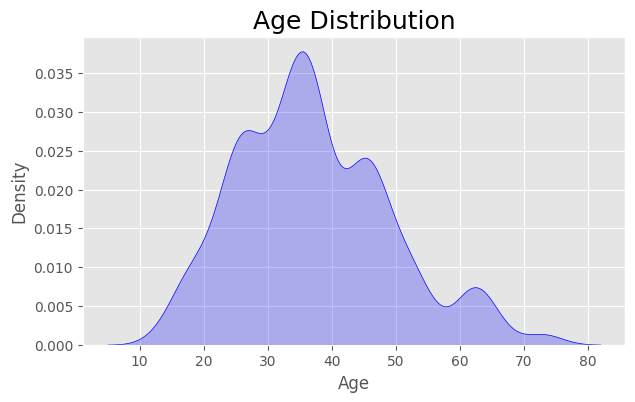

In [24]:
plt.figure(figsize = (7,4))
sns.kdeplot(df.Age, fill = True, color = "b")
plt.title("Age Distribution", fontsize = 18)
plt.show()

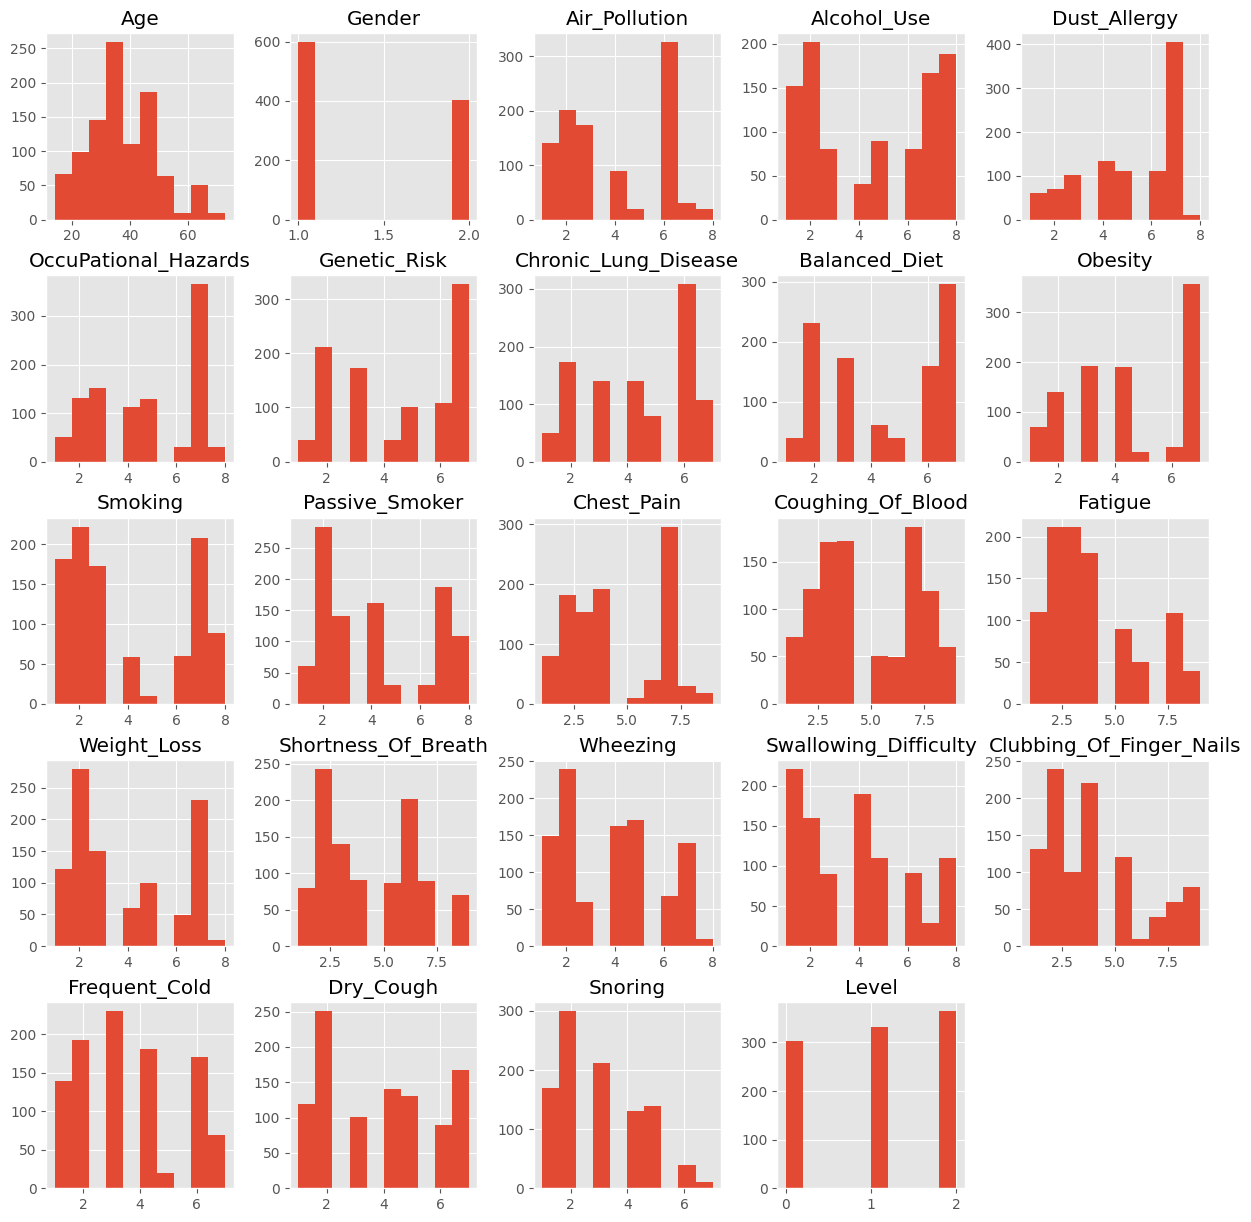

In [25]:
_ = df.hist(figsize=(15, 15))

## Visualizing the dataset by asking questions with assumption and prior knowledge
What questions to ask? (start from common sense and world knowledge)
1. Smoking and passive smoker features definitely play a significant role, caution printed on cigarette packages warning the consumers.

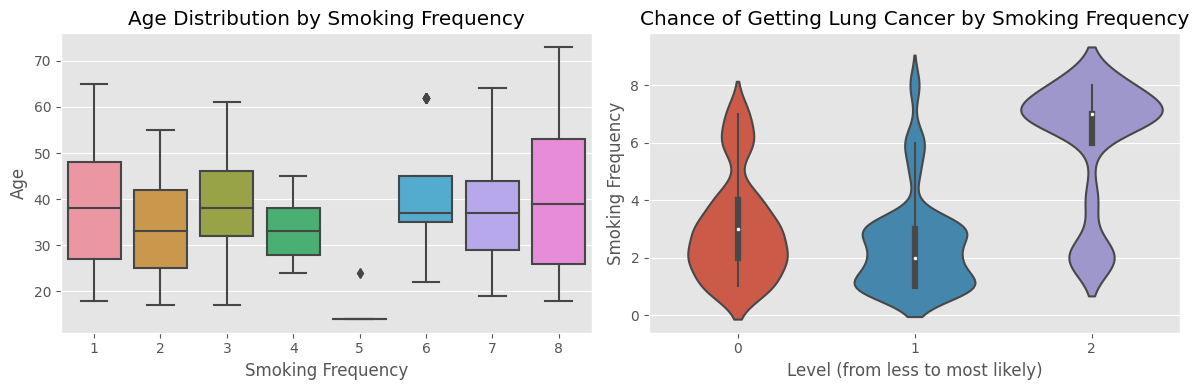

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.boxplot(x='Smoking', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Smoking Frequency')
axes[0].set_xlabel('Smoking Frequency')
axes[0].set_ylabel('Age')

sns.violinplot(x='Level', y='Smoking', data=df, ax=axes[1])
axes[1].set_title('Chance of Getting Lung Cancer by Smoking Frequency')
axes[1].set_xlabel('Level (from less to most likely)')
axes[1].set_ylabel('Smoking Frequency')

plt.tight_layout()
plt.show()

In [27]:
def plot_scatter_by_feature(df, target_feature, n_cols=4):
    """
    Creates a grid of scatterplots comparing a targeted feature to the remaining features, 
    using the target_feature as the x-axis variable.
    
    Parameters:
    - df: pandas DataFrame containing the data to be plotted.
    - target_feature: a string representing the name of the targeted feature.
    - n_cols: an integer representing the number of columns in the subplot grid (default 4).
    
    Returns:
    - None
    """
    if target_feature not in df.columns:
        raise ValueError('Target feature "{}" not found in DataFrame.'.format(target_feature))
    
    cols = list(df.columns)
    cols.remove(target_feature)

    # Calculate number of rows and columns needed for subplots
    n_rows = (len(cols) + n_cols - 1) // n_cols

    # Set up subplots with appropriate number of rows and columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))

    # Create scatterplots of target feature vs. each variable for each row
    for i, row in enumerate(axes):
        for j, ax in enumerate(row):
            if (i*n_cols+j) < len(cols):
                col = cols[(i*n_cols)+j]
                sns.scatterplot(x=target_feature, y=col, hue='Level', data=df, ax=ax)
                title_font_size = 12 - (n_cols - 4) * 2
                ax.set_title('{} vs. {}'.format(target_feature, col), fontsize=title_font_size)

    plt.tight_layout()
    plt.show()

In [28]:
symptoms = ['Chest_Pain', 'Coughing_Of_Blood', 'Fatigue', 
            'Weight_Loss', 'Shortness_Of_Breath', 'Wheezing',
            'Swallowing_Difficulty', 'Clubbing_Of_Finger_Nails', 'Frequent_Cold',
            'Dry_Cough', 'Snoring']
nonsymptoms = ['Age', 'Gender', 'Air_Pollution',
               'Alcohol_Use', 'Dust_Allergy', 'OccuPational_Hazards',
               'Genetic_Risk', 'Chronic_Lung_Disease','Balanced_Diet',
               'Obesity', 'Smoking', 'Passive_Smoker']
len(symptoms) + len(nonsymptoms)

def plot_pairplot(df, columns, hue='Level', kdeplot=False):
    g = sns.pairplot(df, vars=columns, hue=hue)
    if kdeplot:
        g.map_lower(sns.kdeplot, fill=True, thresh=0.05)
    plt.show()

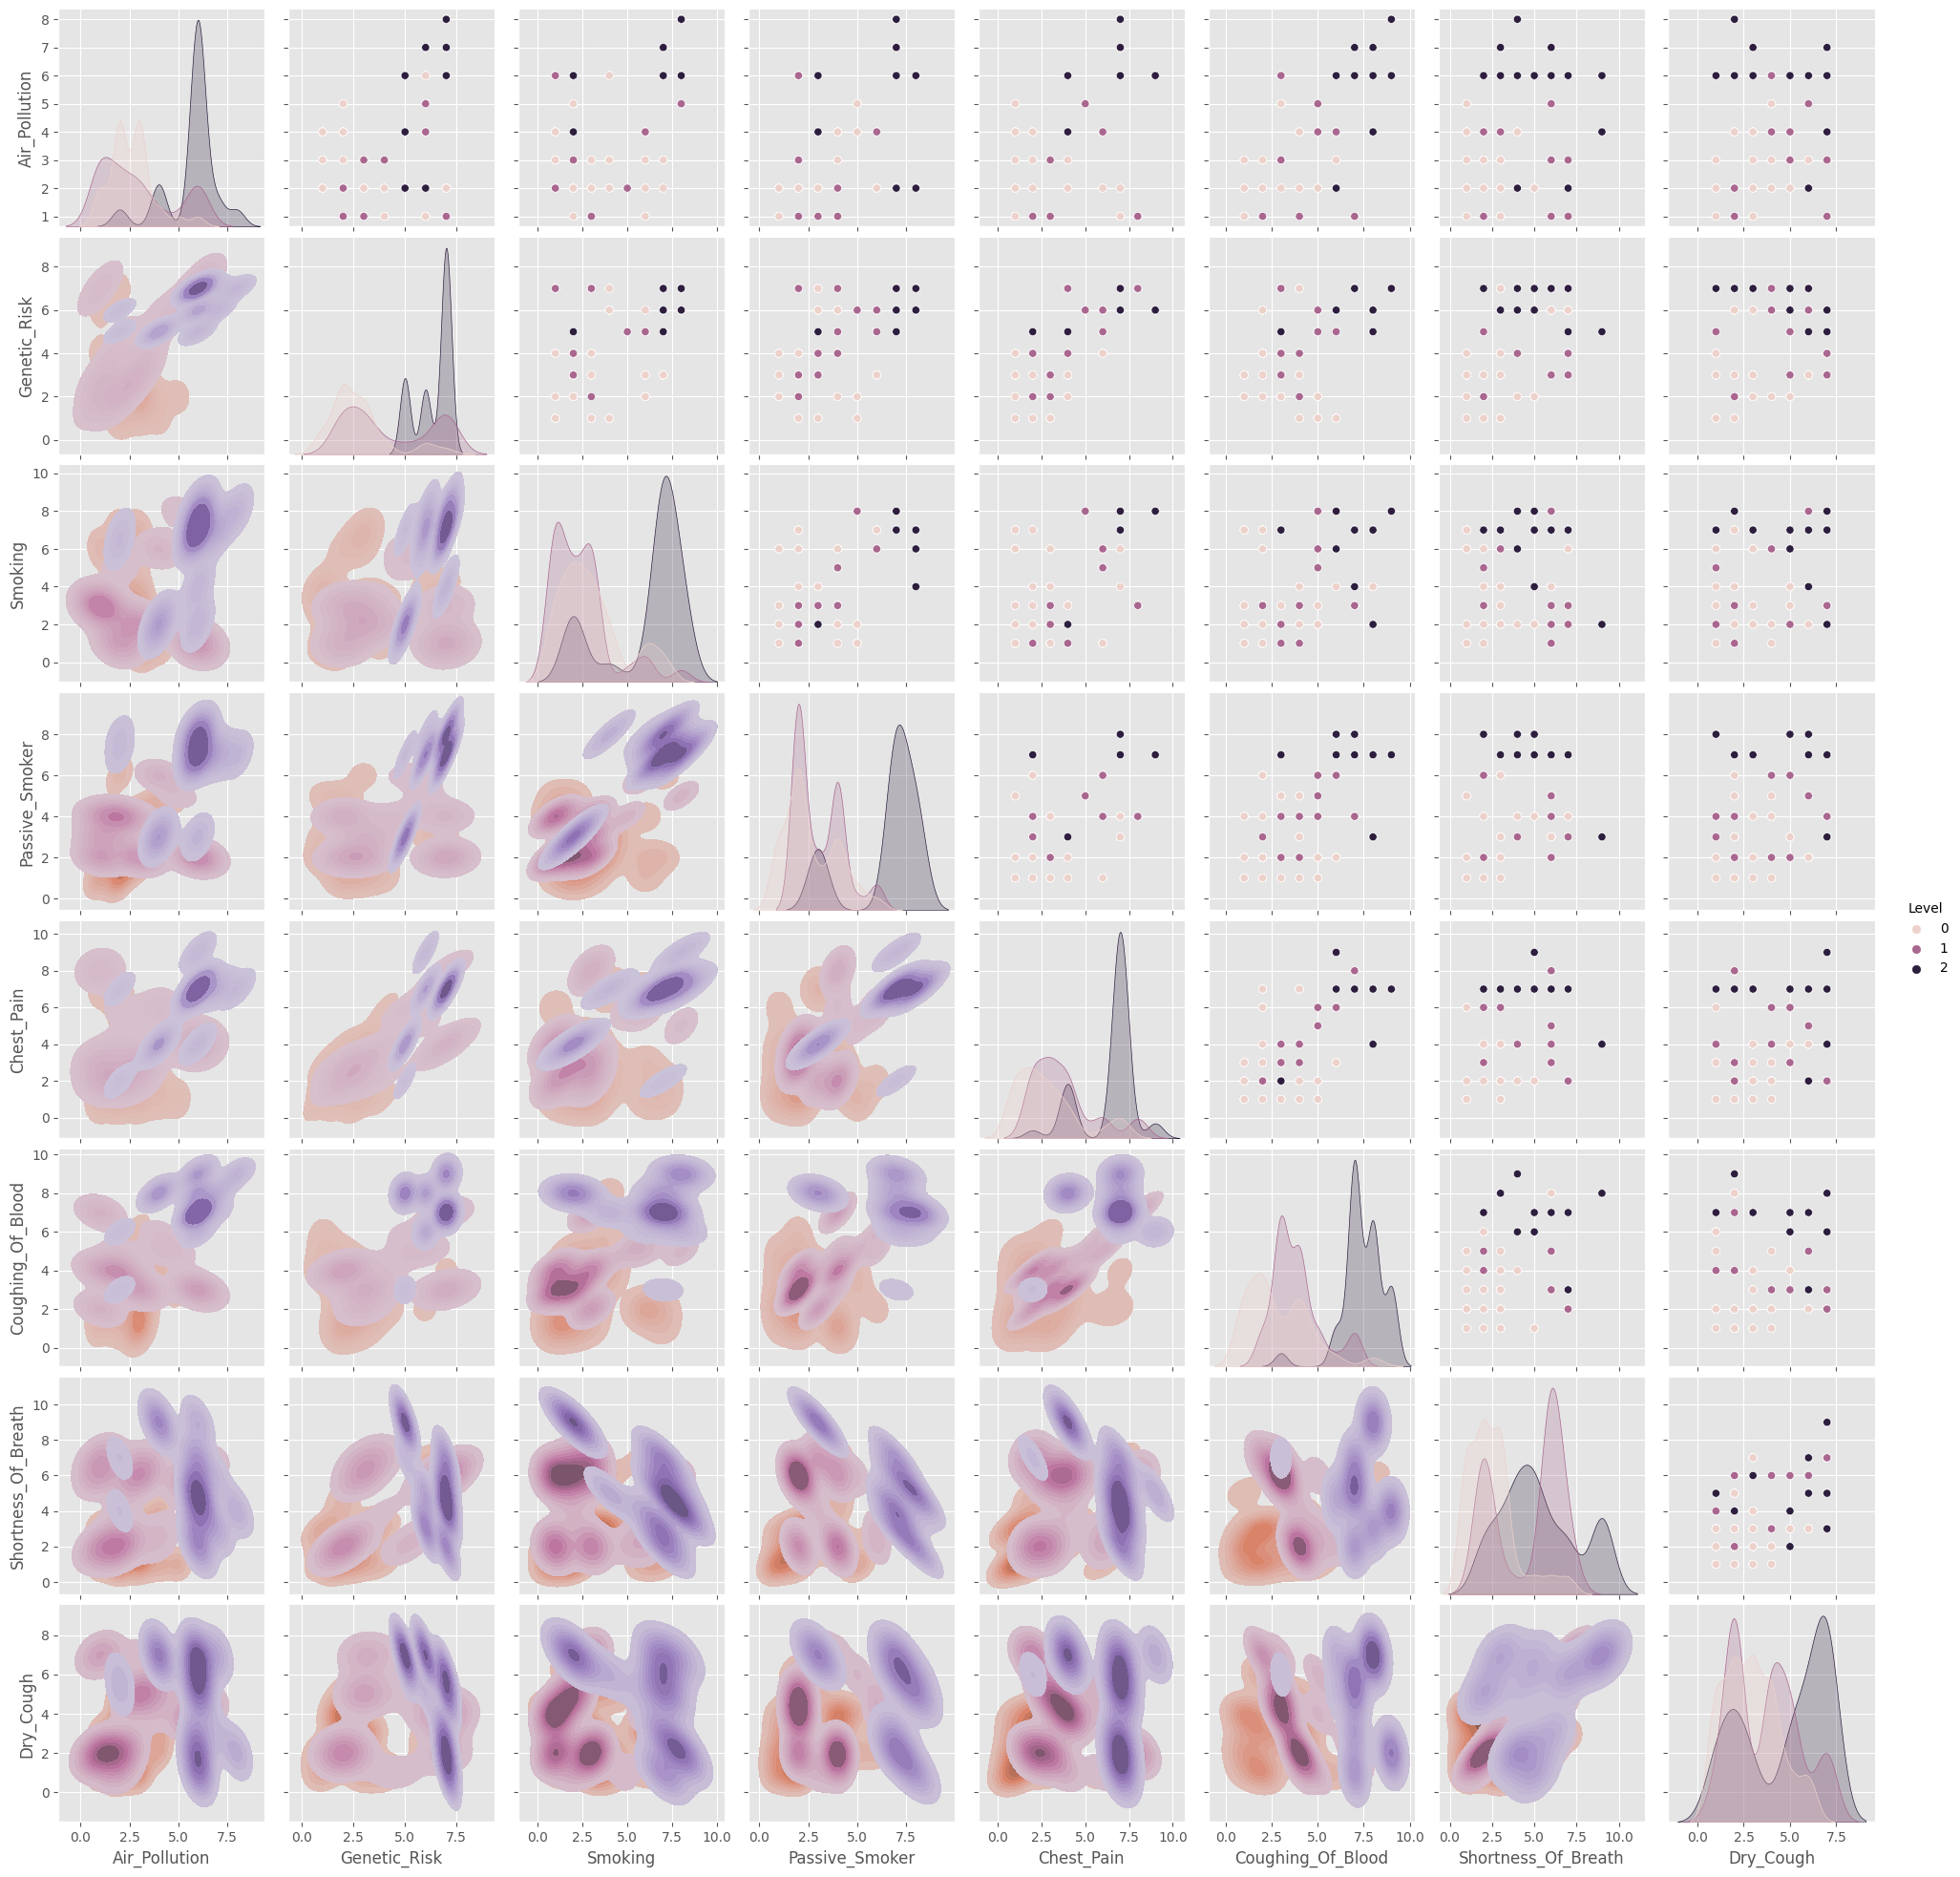

In [29]:
plot_pairplot(df, ['Air_Pollution', 'Genetic_Risk','Smoking', 'Passive_Smoker', 'Chest_Pain',
                   'Coughing_Of_Blood', 'Shortness_Of_Breath','Dry_Cough'], hue='Level', kdeplot=True)

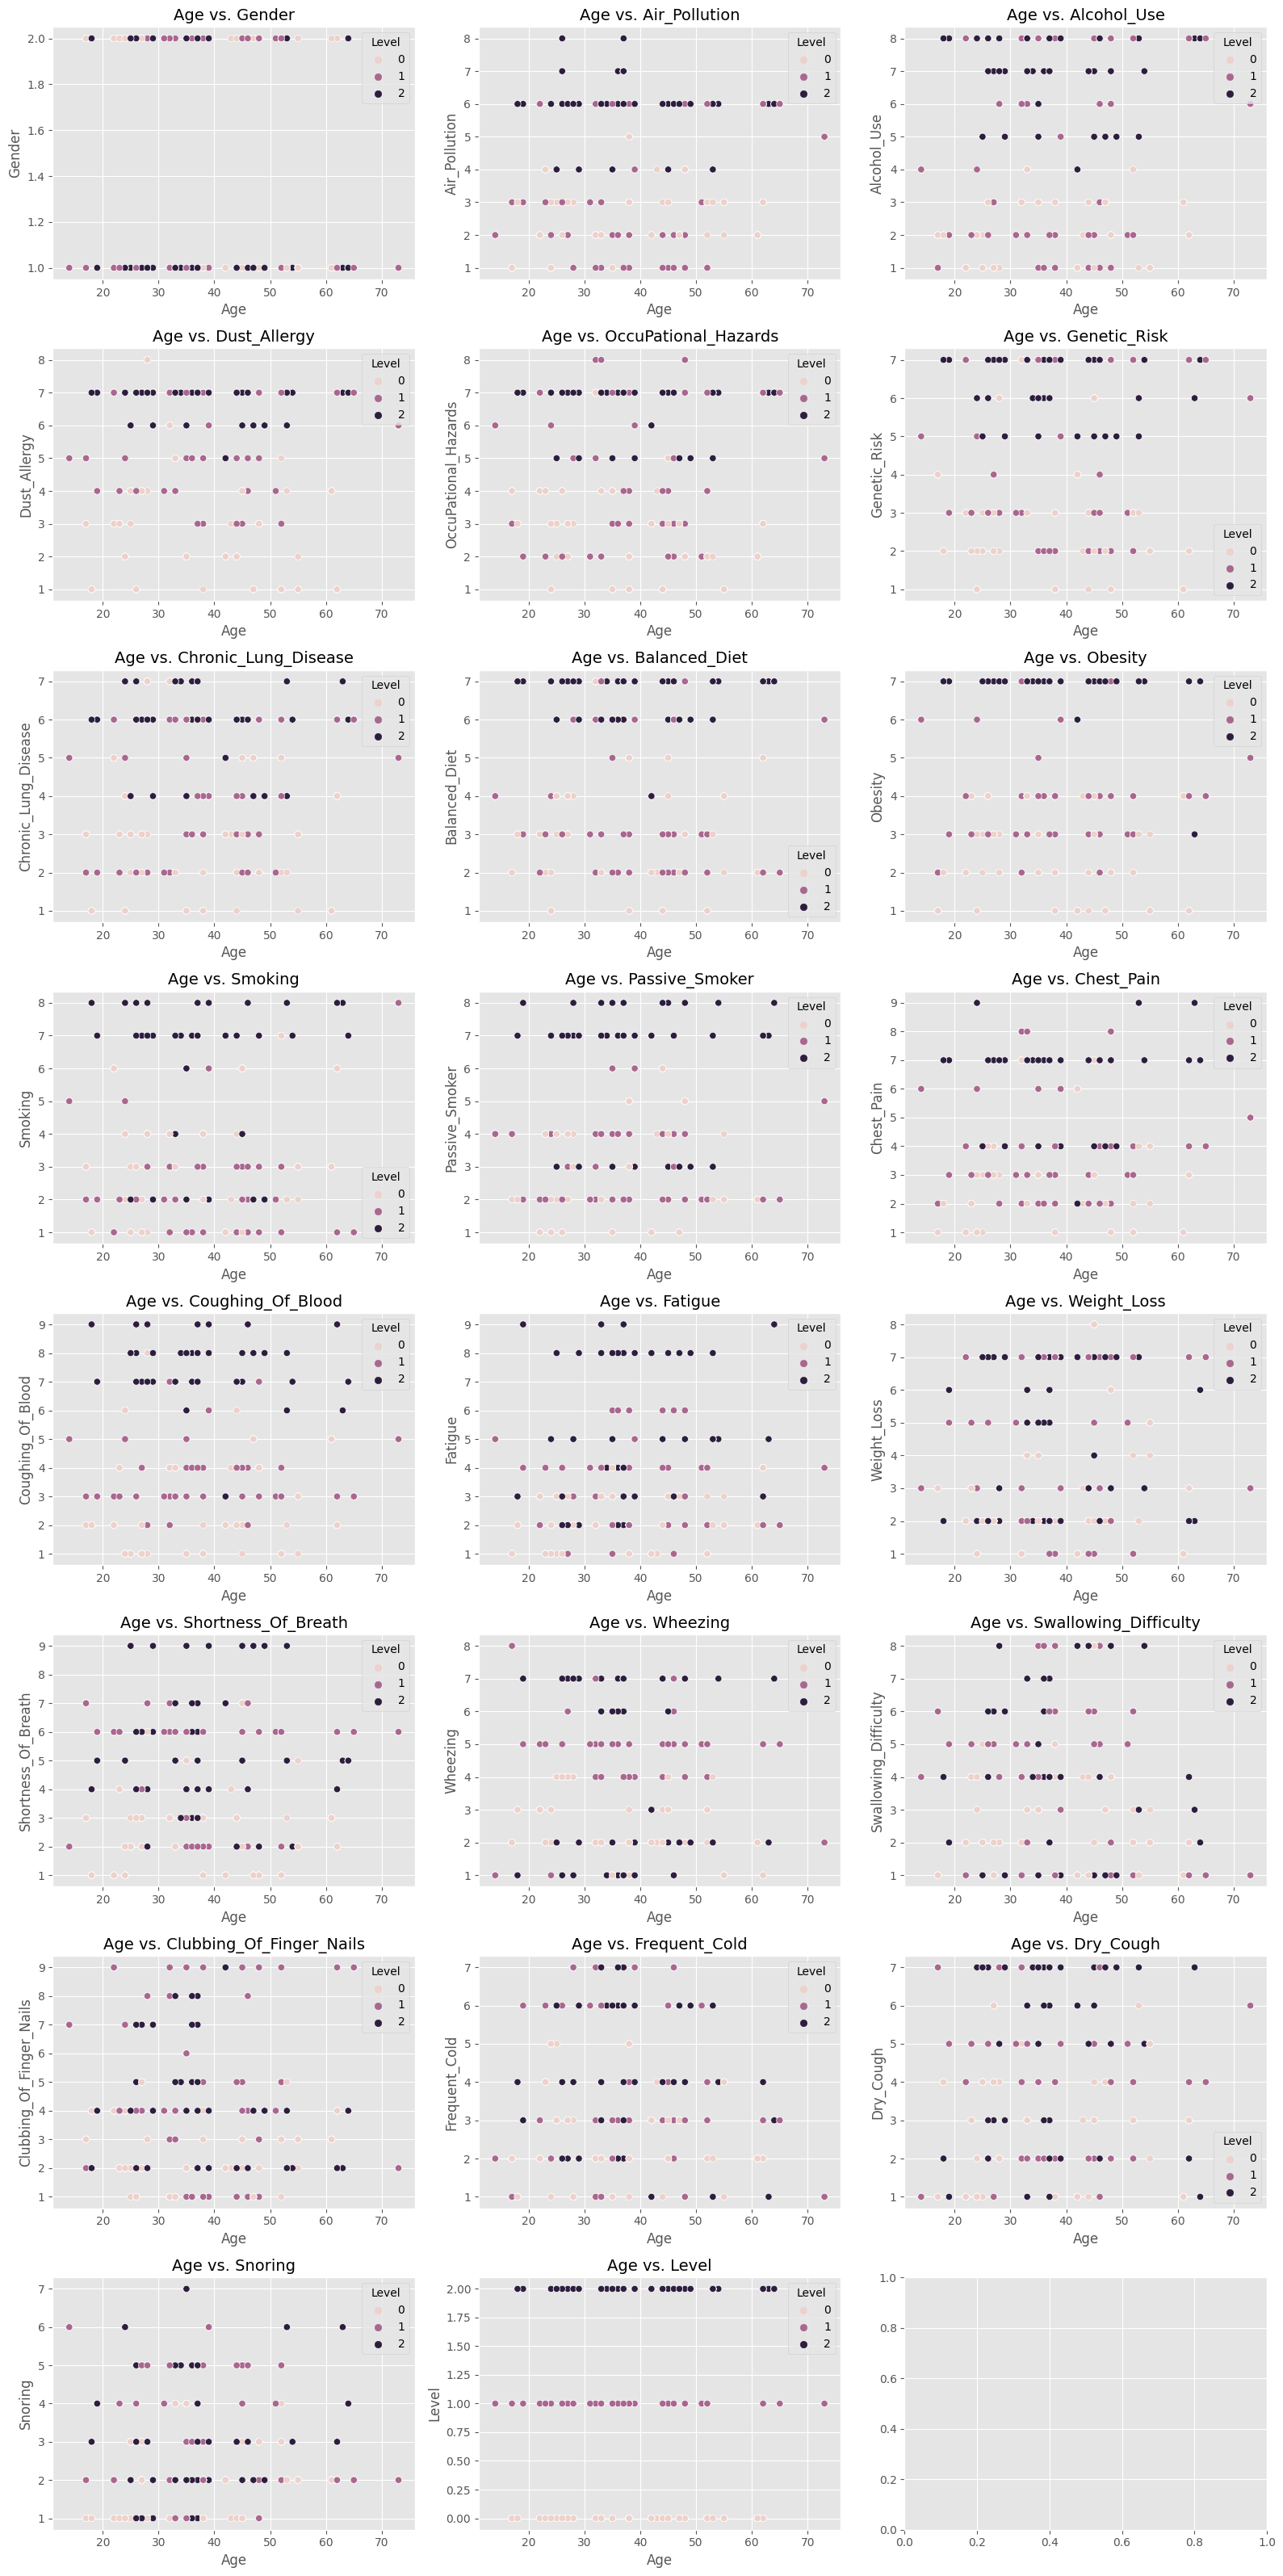

In [30]:
# Compare the target feature to all other features
plot_scatter_by_feature(df, 'Age', 3)

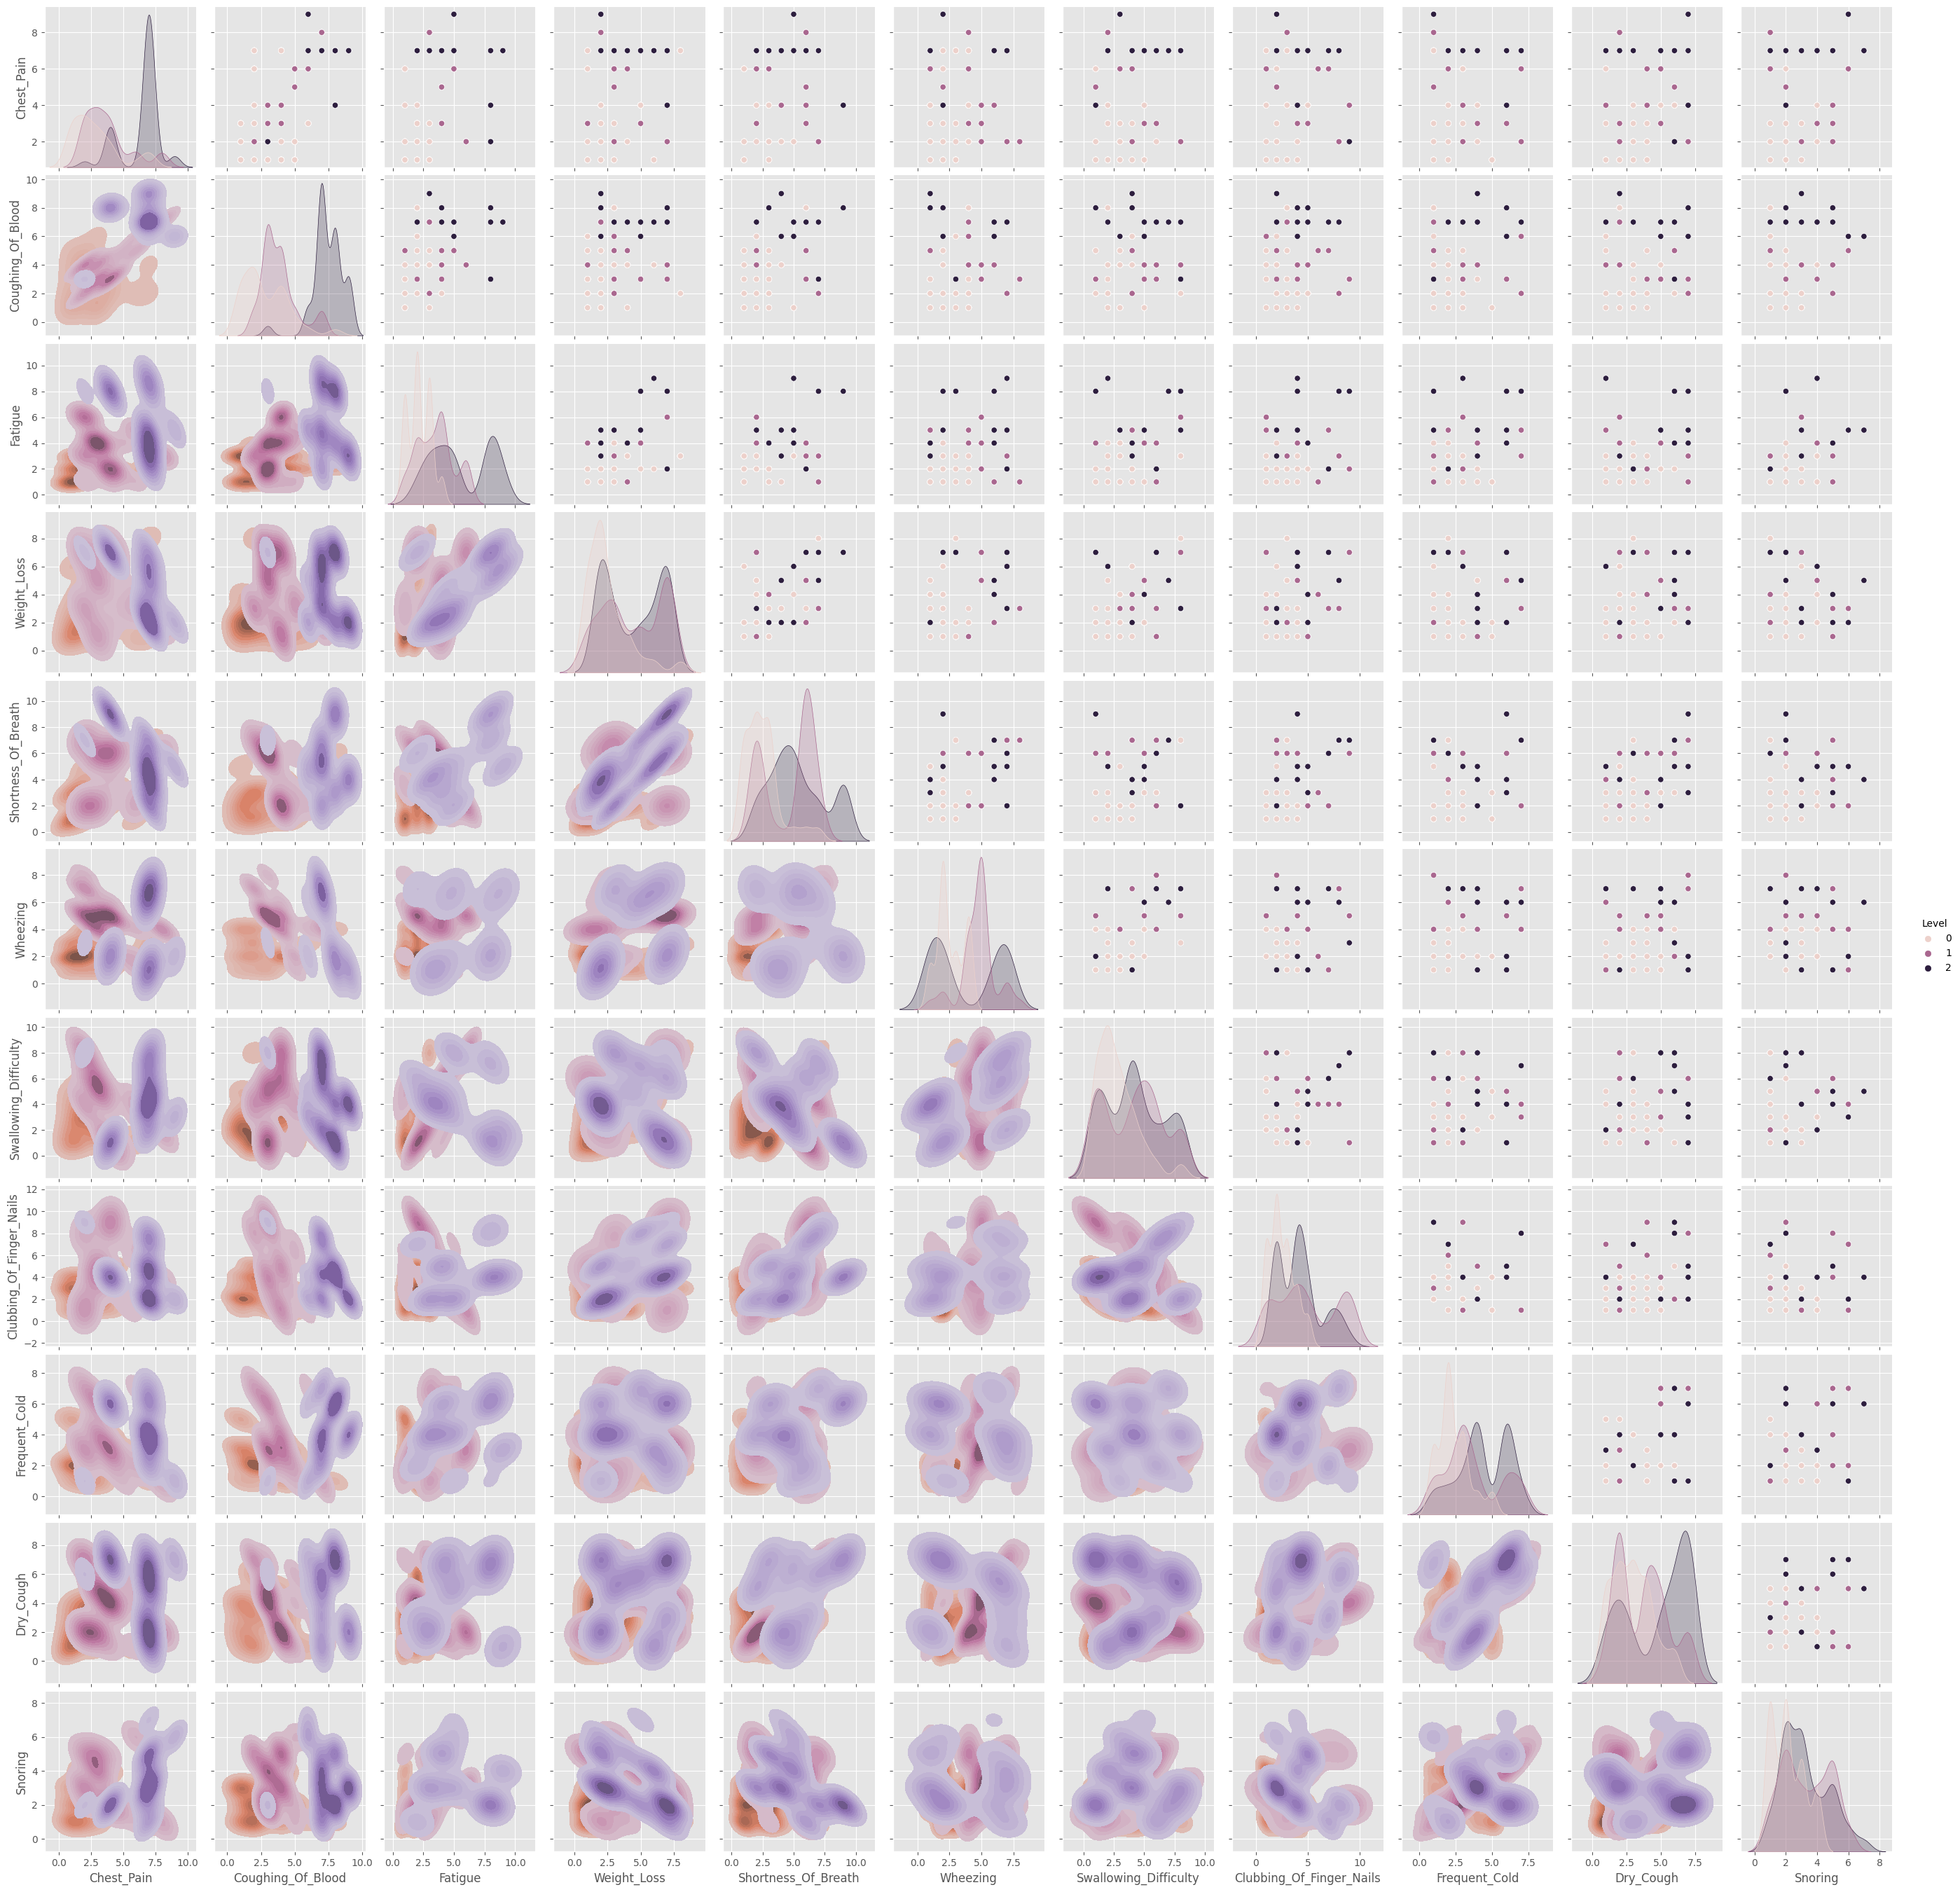

In [31]:
plot_pairplot(df, symptoms, kdeplot=True)

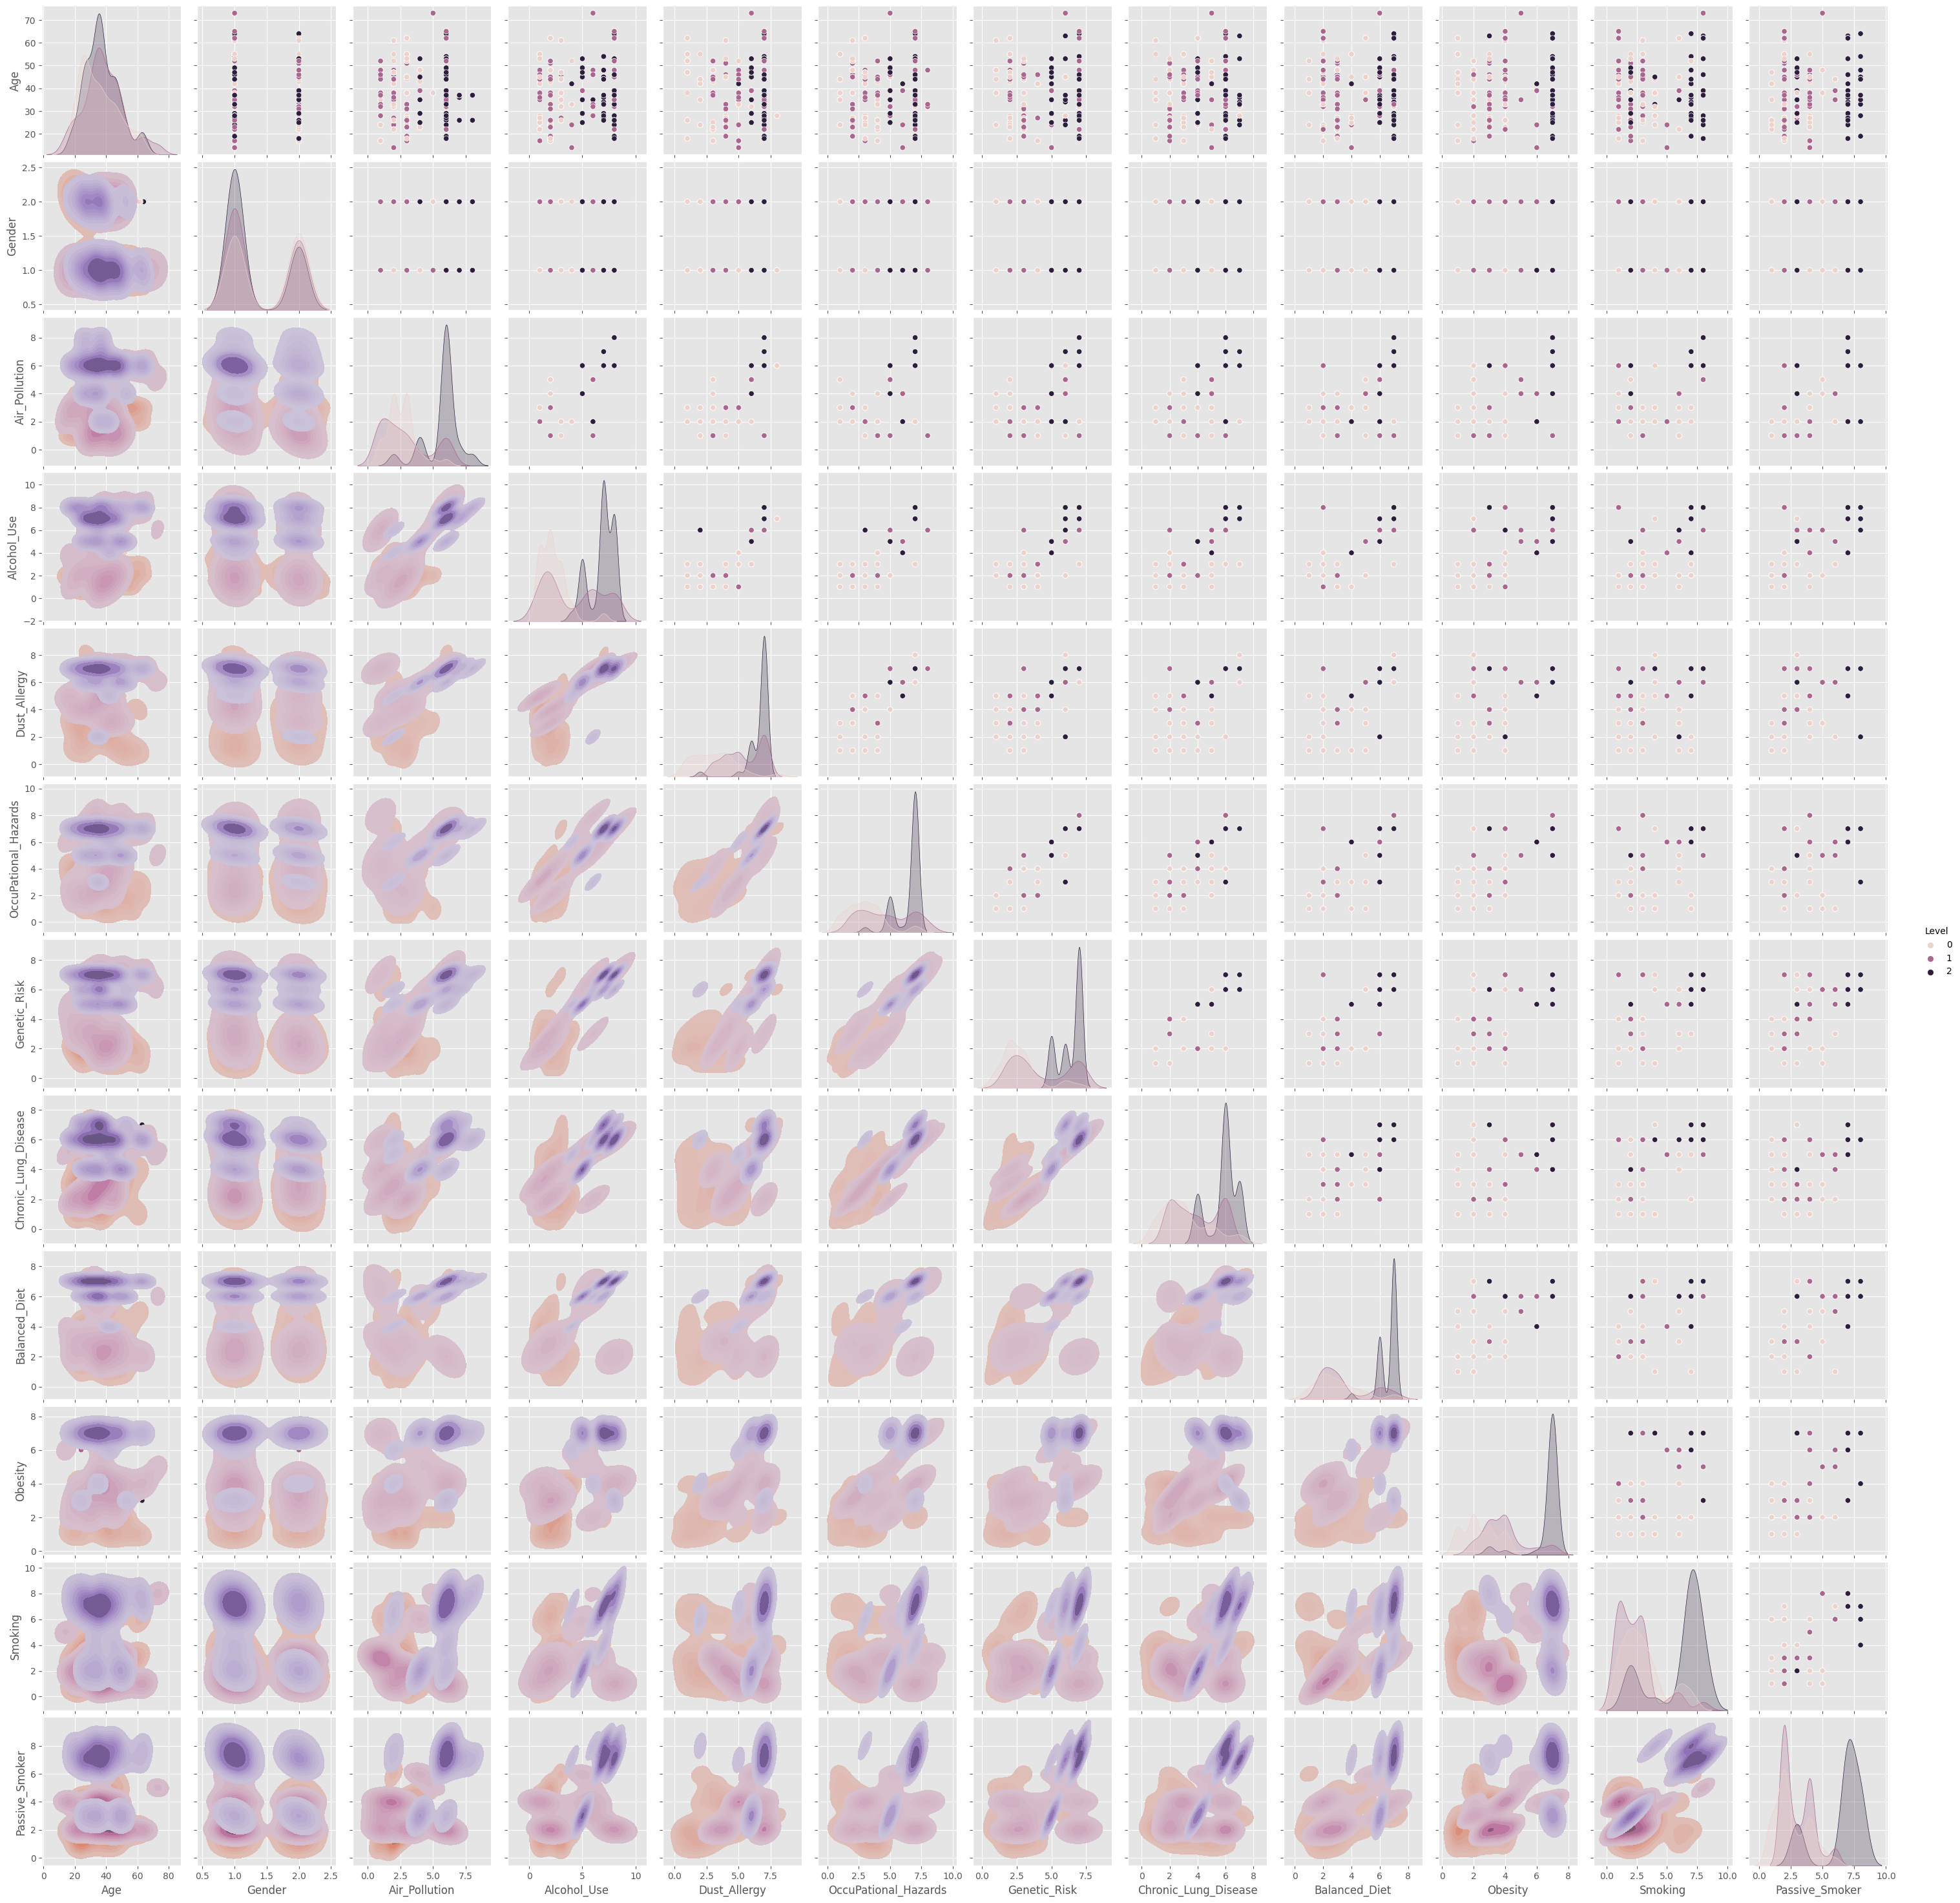

In [32]:
plot_pairplot(df, nonsymptoms, kdeplot=True)

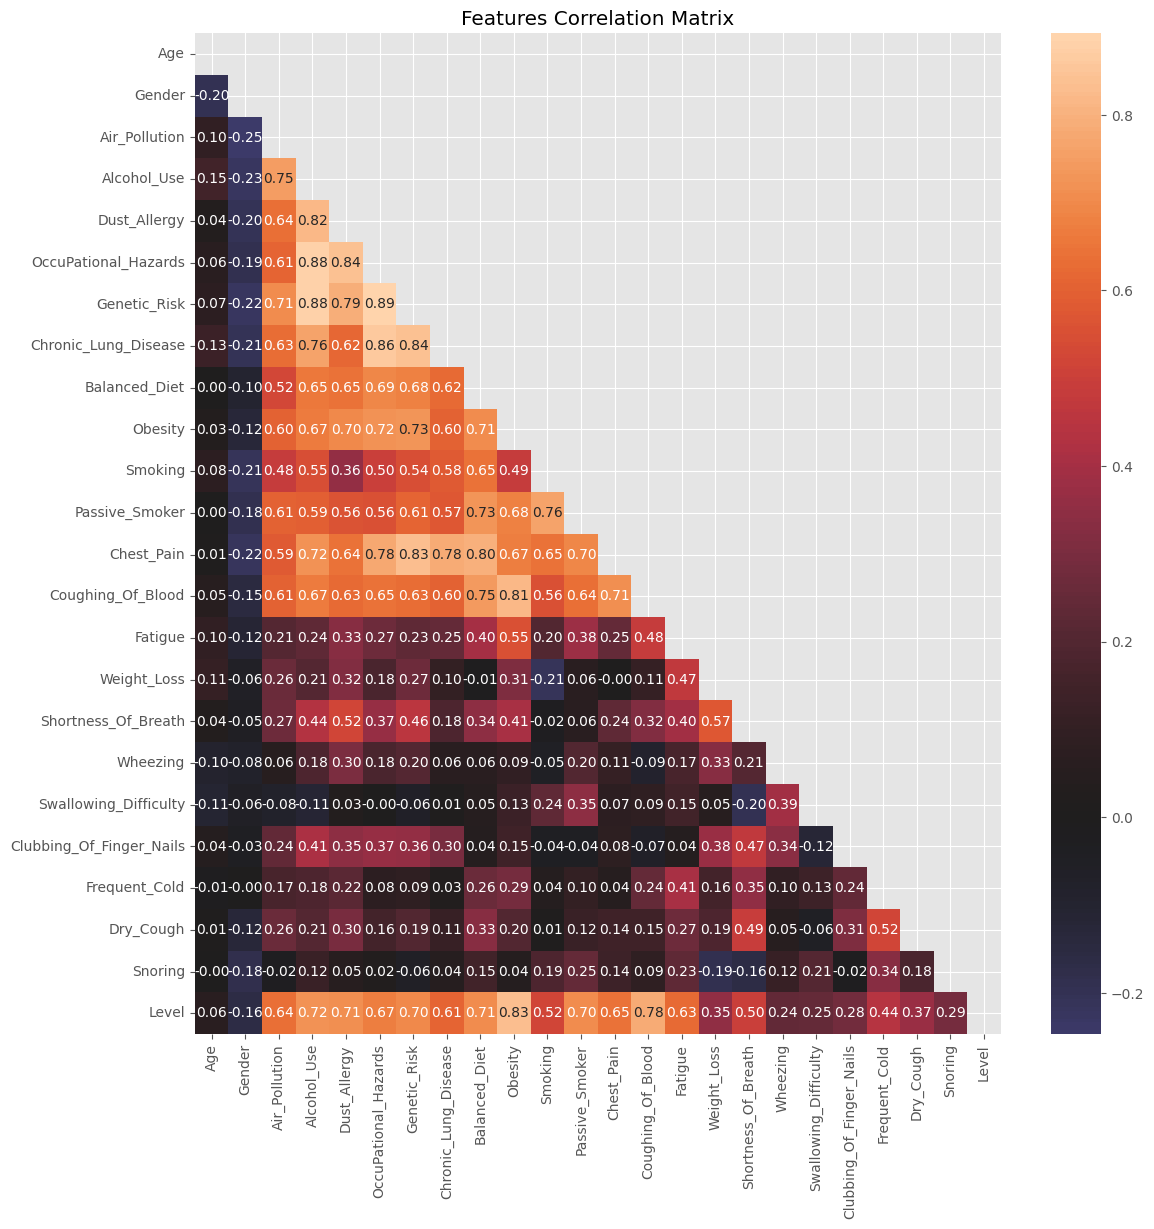

In [33]:
plt.figure(figsize=(13, 13))
correlation = df.corr() # default method -> pearson
# create a mask to show only part of the matrix
# and not repeat it above the main diagonal
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)
_ = plt.title("Features Correlation Matrix")

In [34]:
def bin_age_by_width(age, max_age=150, bin_size=5, num_bins=30, start_from_zero=False):
    """
    Bin the age attribute based on equal width binning.

    Parameters:
    age (pandas.Series): The Series object containing the age values to be binned.
    max_age (int, optional): The max age. Default is 150.
    bin_size (int, optional): The size of each bin. Default is 5.
    num_bins (int, optional): The total number of bins. Default is 30.
    start_from_zero (bool, optional): Whether the binning indices should start from 0 or 1. Default is True.

    Returns:
    pandas.Series: A Series of binning indices for the age values.
    """
    if any(age < 0) or any(age > max_age):
        raise ValueError("Age value is out of range.")

    binning_index = (age / bin_size).astype(int)
    binning_index = binning_index.clip(upper=num_bins - 1)

    if not start_from_zero:
        binning_index = binning_index + 1

    return binning_index

In [35]:
def bin_age_by_frequency(age, num_bins=20, start_from_zero=False, min_age=0, max_age=150):
    """
    Bin the age attribute based on equal frequency binning, placing remaining samples of the same age into the next bin.

    Parameters:
    age (pandas.Series): The Series object containing the age values.
    num_bins (int, optional): The number of bins. Default is 20.
    start_from_zero (bool, optional): Whether the binning indices should start from 0 or 1. Default is False.
    min_age (int, optional): The minimum age value to be binned. Default is 0.
    max_age (int, optional): The maximum age value to be binned. Default is 150.

    Returns:
    pandas.Series: A Series of binning indices for the age values.
    """
    age = age[(age >= min_age) & (age <= max_age)]

    # Calculate the bin size and number of remaining samples
    num_samples = len(age)
    bin_size = num_samples // num_bins
    num_remaining = num_samples % num_bins

    sorted_age = age.sort_values()

    # Assign age values to bins
    binned_age = pd.Series(np.nan, index=age.index)
    current_bin = 0
    count = 0

    for index in sorted_age.index:
        if count >= bin_size:
            if current_bin < num_remaining:
                bin_size = num_samples // num_bins + 1
            else:
                bin_size = num_samples // num_bins
            current_bin += 1
            count = 0

        binned_age[index] = current_bin if start_from_zero else current_bin + 1
        count += 1

    return binned_age

In [36]:
df_copy = df.copy()

for col in ['Age_Binning_Width', 'Age_Binning_Frequency']:
    if col in df_copy.columns:
        df_copy.drop(columns=[col], inplace=True)

# df_copy.insert(1, 'Age_Binning_Width', df_copy['Age'].apply(bin_age_by_width))
df_copy.insert(1, 'Age_Binning_Width', bin_age_by_width(df_copy['Age']))
df_copy.insert(2, 'Age_Binning_Frequency', bin_age_by_frequency(df_copy['Age']))


In [37]:
# Age_Binning is 1-based
df_copy = df_copy.astype('int16')
df_copy.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

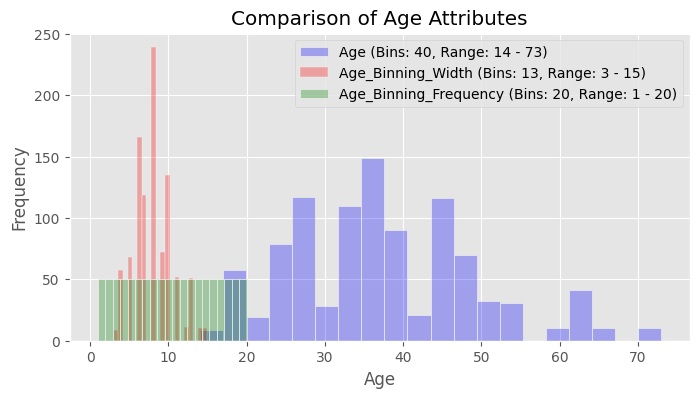

In [38]:
colors = ['blue', 'red', 'green']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=df_copy, x='Age', bins=20, alpha=0.3,
             label=f'Age (Bins: {len(df_copy["Age"].unique())}, Range: {df_copy["Age"].min()} - {df_copy["Age"].max()})', ax=ax)
sns.histplot(data=df_copy, x='Age_Binning_Width', bins=20, alpha=0.3,
             label=f'Age_Binning_Width (Bins: {len(df_copy["Age_Binning_Width"].unique())}, Range: {df_copy["Age_Binning_Width"].min()} - {df_copy["Age_Binning_Width"].max()})', ax=ax)
sns.histplot(data=df_copy, x='Age_Binning_Frequency', bins=20, alpha=0.3,
             label=f'Age_Binning_Frequency (Bins: {len(df_copy["Age_Binning_Frequency"].unique())}, Range: {df_copy["Age_Binning_Frequency"].min()} - {df_copy["Age_Binning_Frequency"].max()})', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Age Attributes')

ax.legend()
ax.grid(True)

plt.show()

In [39]:
def print_frequency_counts_statistics(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column name '{column_name}' not found in dataframe.")

    counts = df[column_name].value_counts().sort_index()
    min_count = counts.min()
    max_count = counts.max()
    difference = max_count - min_count

    print("Frequency counts:\n", counts)
    print(f"Minimum count: {min_count}")
    print(f"Maximum count: {max_count}")
    print(f"Difference: {difference}\n")

In [40]:
print_frequency_counts_statistics(df_copy, "Age")
print_frequency_counts_statistics(df_copy, "Age_Binning_Frequency")
print_frequency_counts_statistics(df_copy, "Age_Binning_Width")

Frequency counts:
 Age
14     9
17    20
18    18
19    20
22    19
23    19
24    30
25    30
26    37
27    48
28    32
29    19
31     9
32    31
33    69
34    10
35    77
36    21
37    51
38    69
39    21
42    20
43     1
44    51
45    42
46    23
47    20
48    40
49    10
51     1
52    31
53    19
54     1
55    11
61    10
62    30
63     1
64    10
65    10
73    10
Name: count, dtype: int64
Minimum count: 1
Maximum count: 77
Difference: 76

Frequency counts:
 Age_Binning_Frequency
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
13    50
14    50
15    50
16    50
17    50
18    50
19    50
20    50
Name: count, dtype: int64
Minimum count: 50
Maximum count: 50
Difference: 0

Frequency counts:
 Age_Binning_Width
3       9
4      58
5      68
6     166
7     119
8     239
9      72
10    135
11     52
12     11
13     51
14     10
15     10
Name: count, dtype: int64
Minimum count: 9
Maximum count: 239
Difference: 2

In [41]:
# pd.set_option('display.max_rows', 2000)
sorted_df = df_copy.sort_values('Age')
sorted_df[['Age', 'Age_Binning_Width', 'Age_Binning_Frequency']]

/usr/local/lib/python3.9/dist-packages/lux/interestingness/interestingness.py:183: RuntimeWarning:Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [42]:
df = df_copy.copy()
df.shape

(1000, 26)

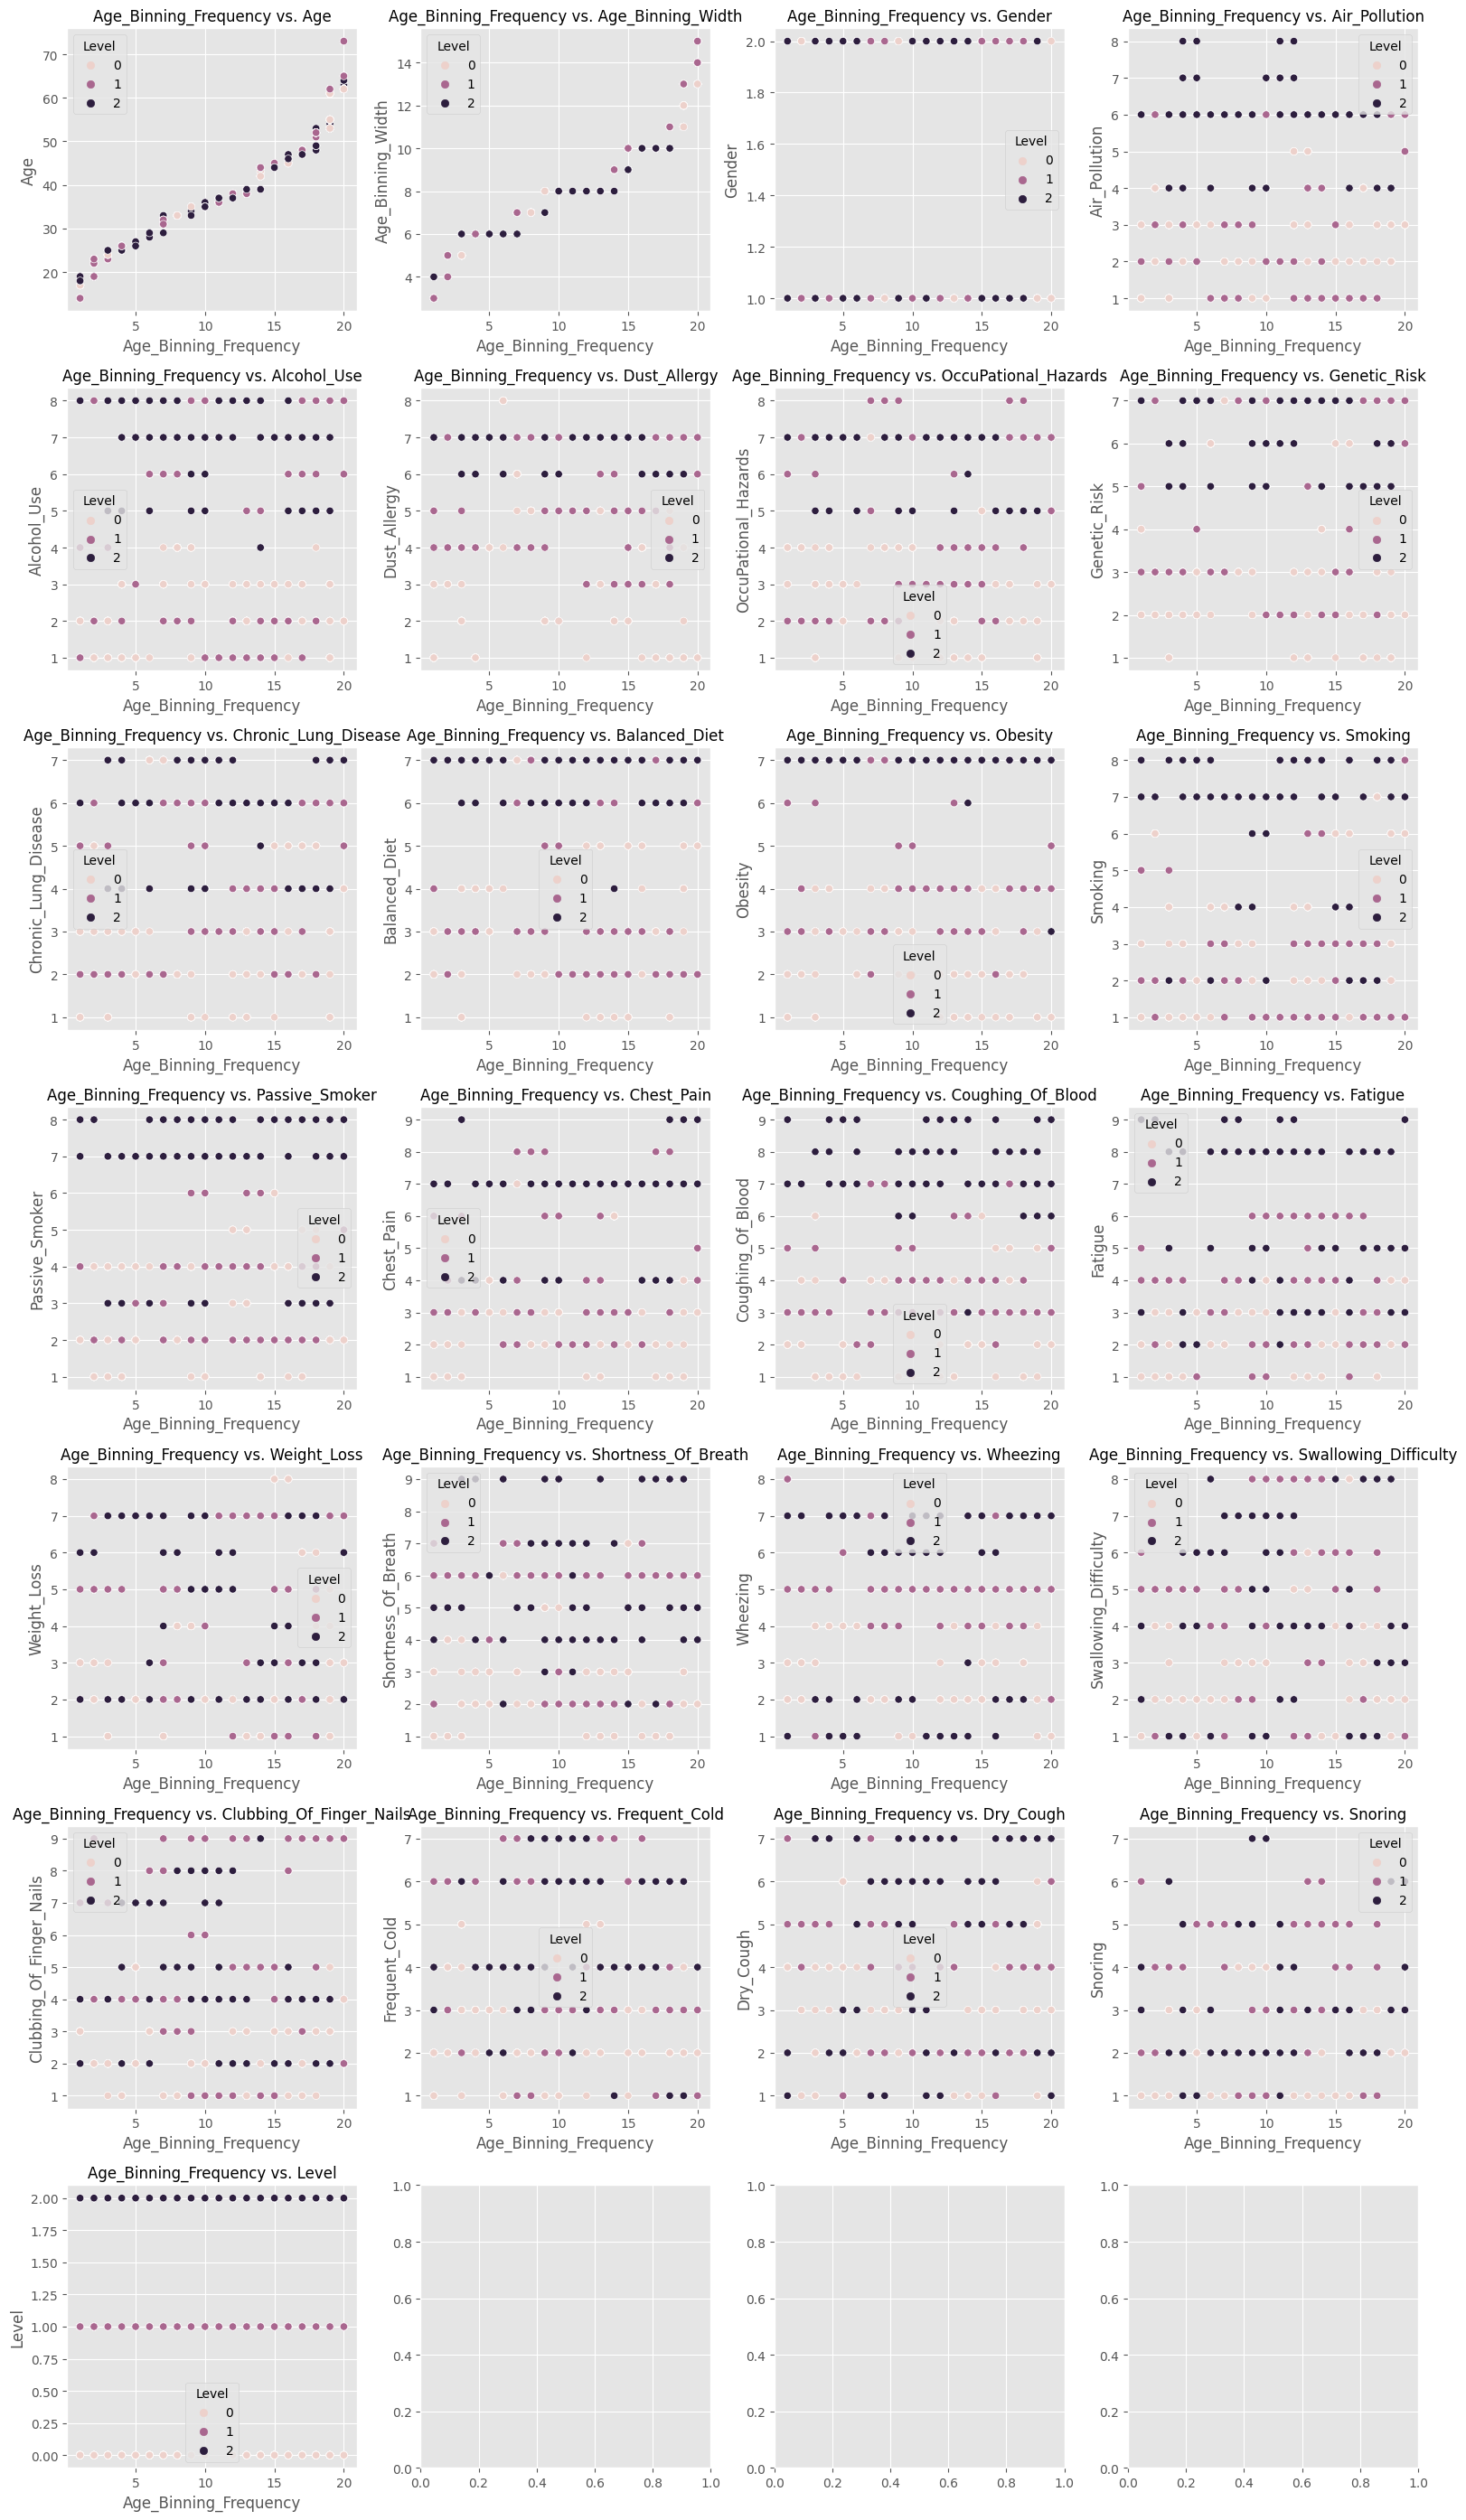

In [43]:
plot_scatter_by_feature(df, 'Age_Binning_Frequency', 4)

In [44]:
# # Age_Binning_Width
# columns = ['Age_Binning_Width'] + symptoms
# plot_pairplot(df, columns)

In [45]:
# # Age_Binning_Width
# columns = ['Age_Binning_Width'] + nonsymptoms
# plot_pairplot(df, columns)

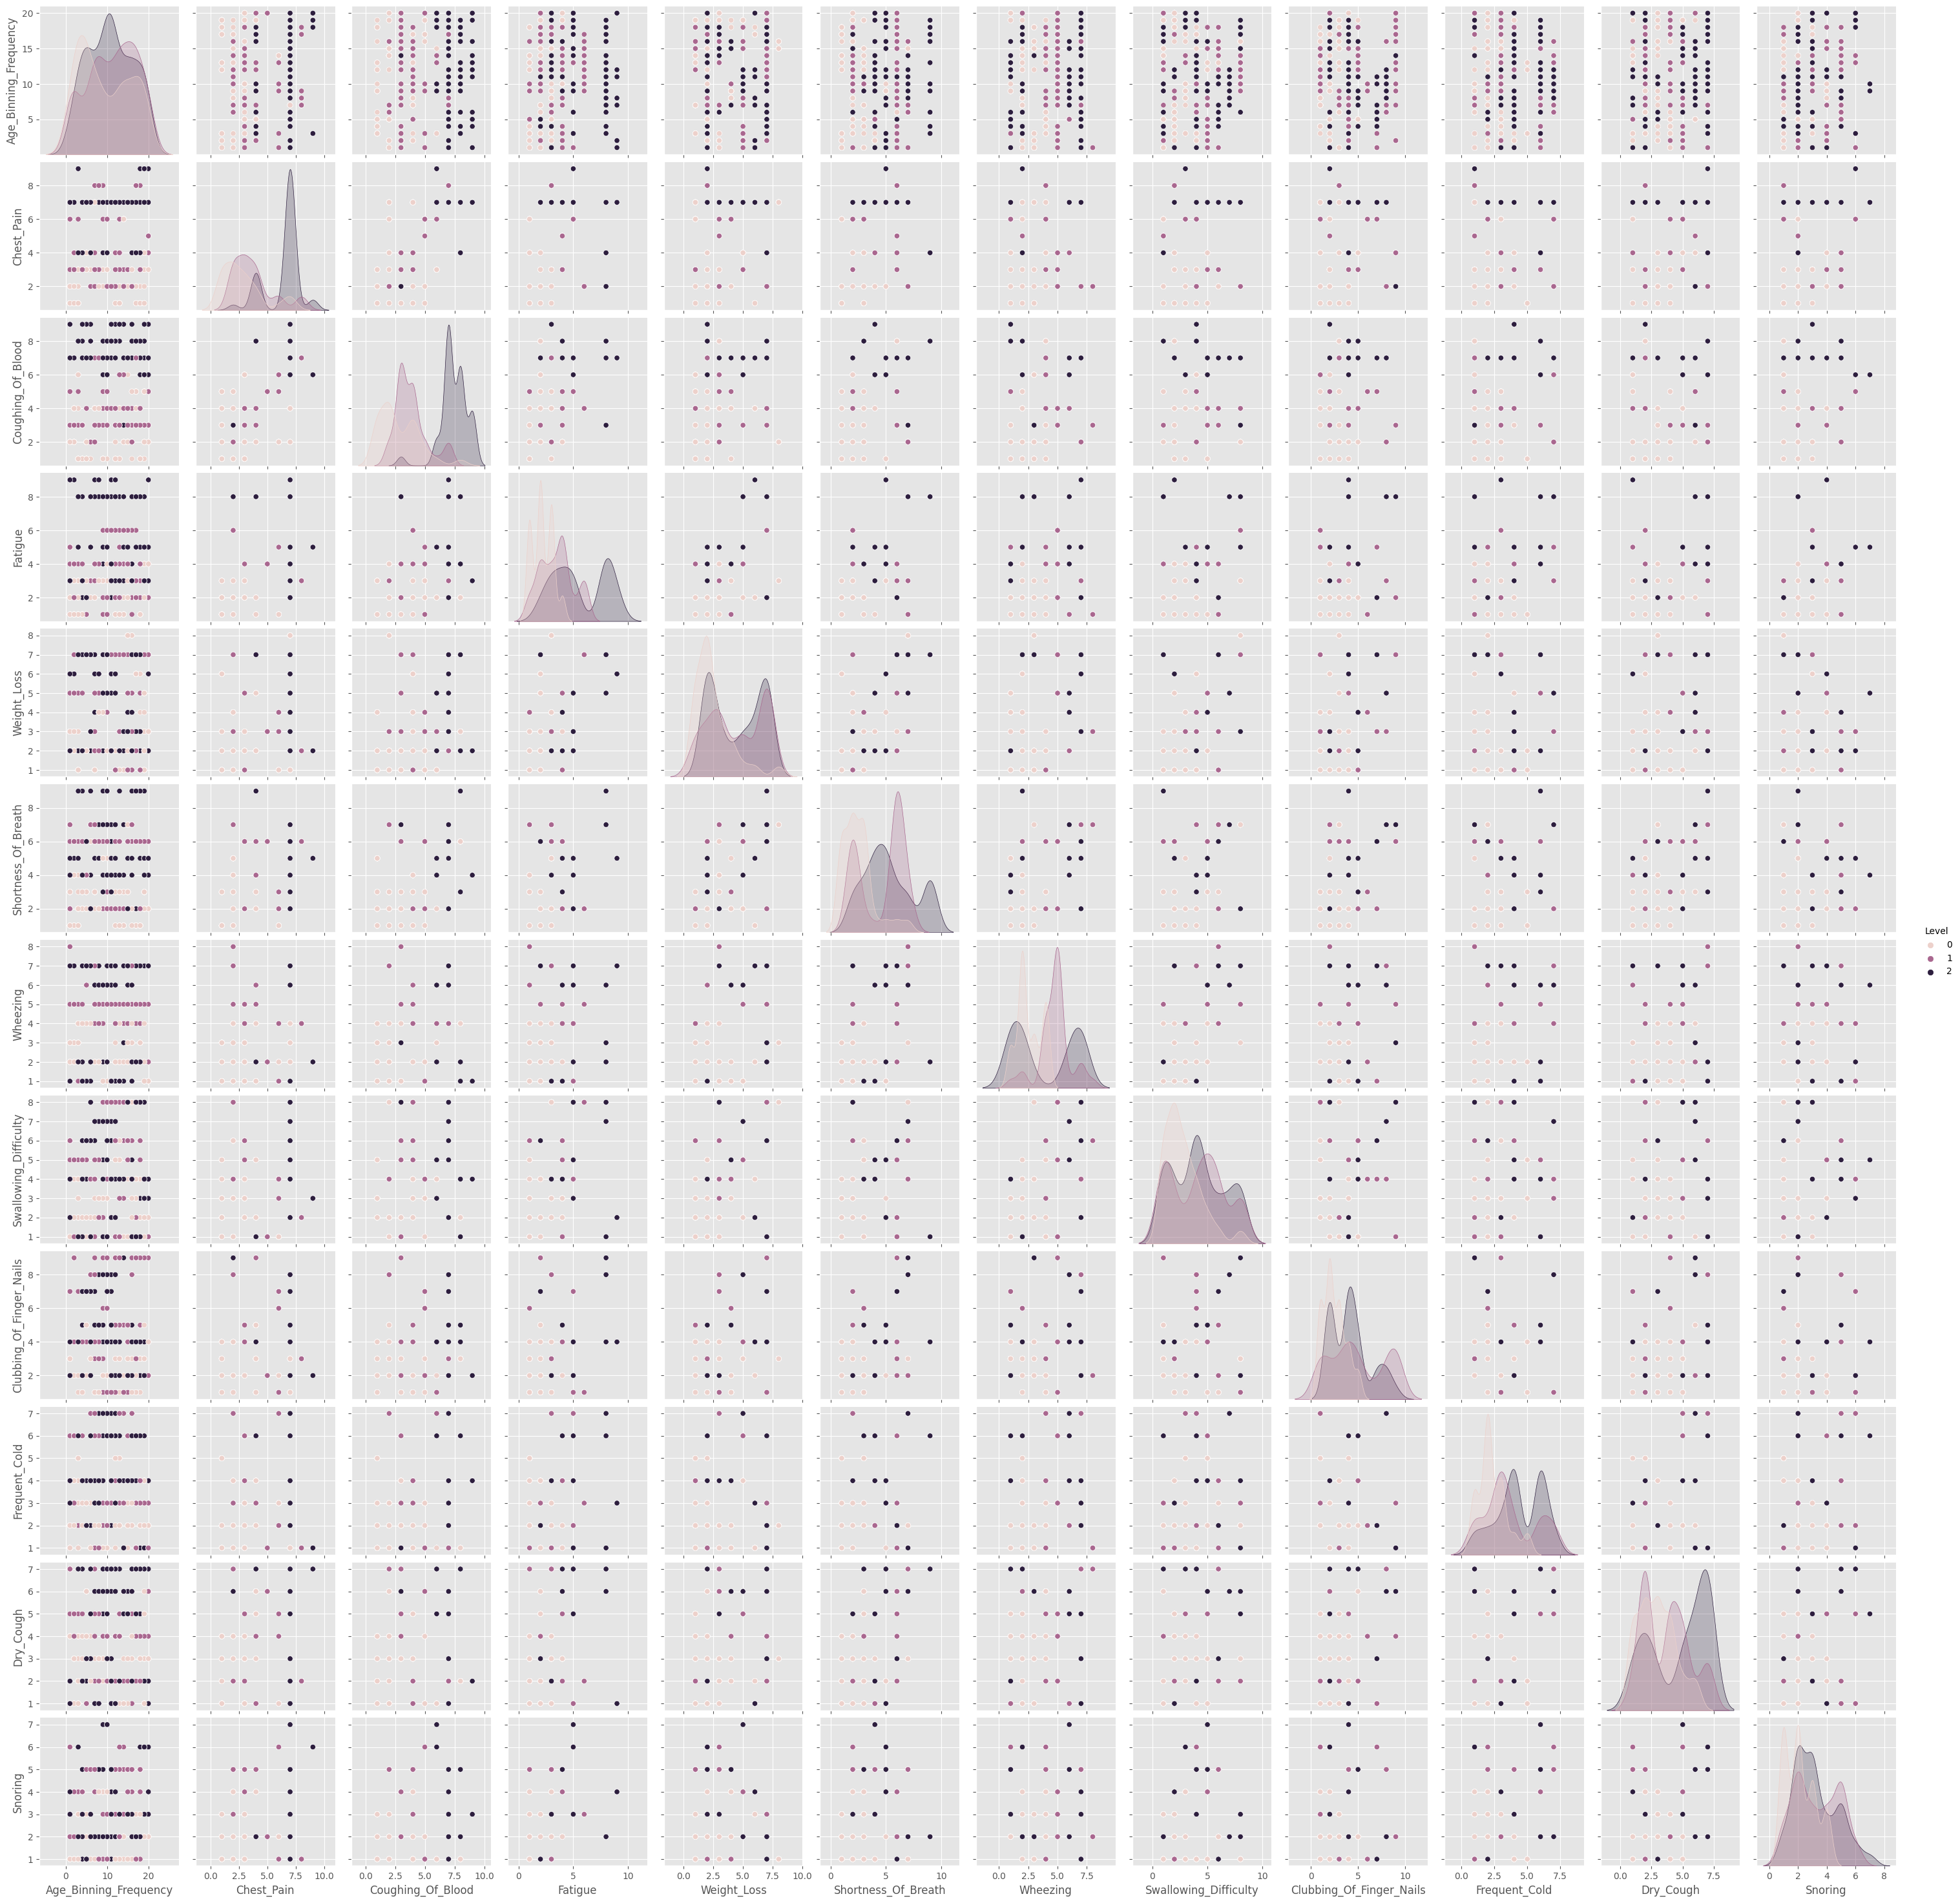

In [46]:
# Age_Binning_Frequency
columns = ['Age_Binning_Frequency'] + symptoms
plot_pairplot(df, columns)

In [47]:
# # Age_Binning_Frequency
# columns = ['Age_Binning_Frequency'] + nonsymptoms
# plot_pairplot(df, columns)

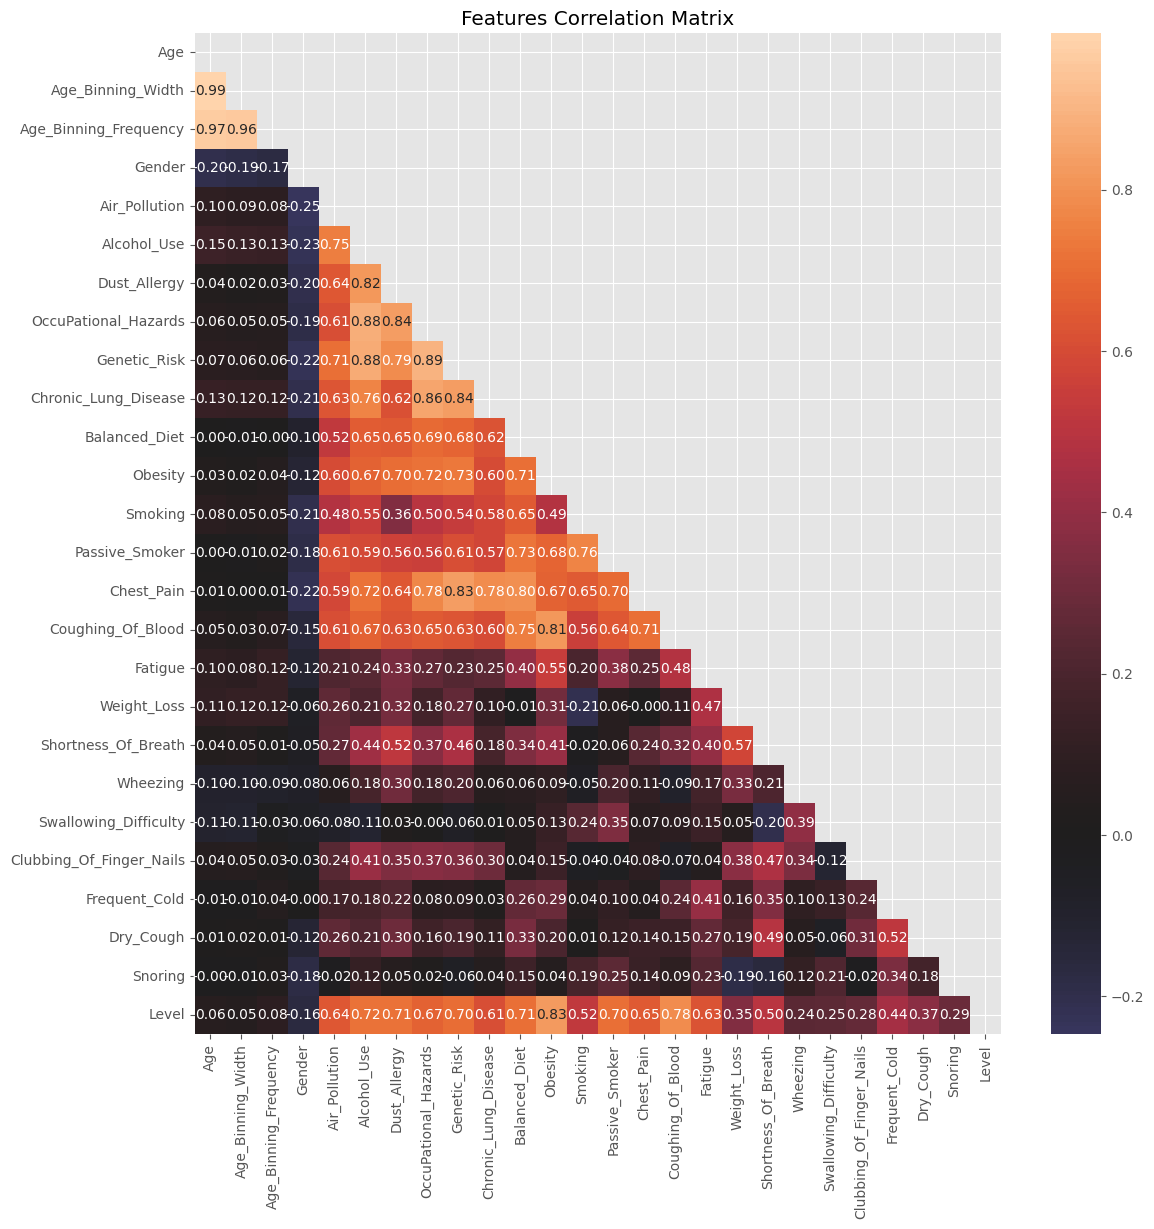

In [48]:
plt.figure(figsize=(13, 13))
correlation = df.corr() # default method -> pearson
# create a mask to show only part of the matrix
# and not repeat it above the main diagonal
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)
_ = plt.title("Features Correlation Matrix")

FeatureCorrelation(ax=<Axes: >,
                   labels=Index(['Age', 'Age_Binning_Width', 'Age_Binning_Frequency', 'Gender',
       'Air_Pollution', 'Alcohol_Use', 'Dust_Allergy', 'OccuPational_Hazards',
       'Genetic_Risk', 'Chronic_Lung_Disease', 'Balanced_Diet', 'Obesity',
       'Smoking', 'Passive_Smoker', 'Chest_Pain', 'Coughing_Of_Blood',
       'Fatigue', 'Weight_Loss', 'Shortness_Of_Breath', 'Wheezing',
       'Swallowing_Difficulty', 'Clubbing_Of_Finger_Nails', 'Frequent_Cold',
       'Dry_Cough', 'Snoring'],
      dtype='object'))

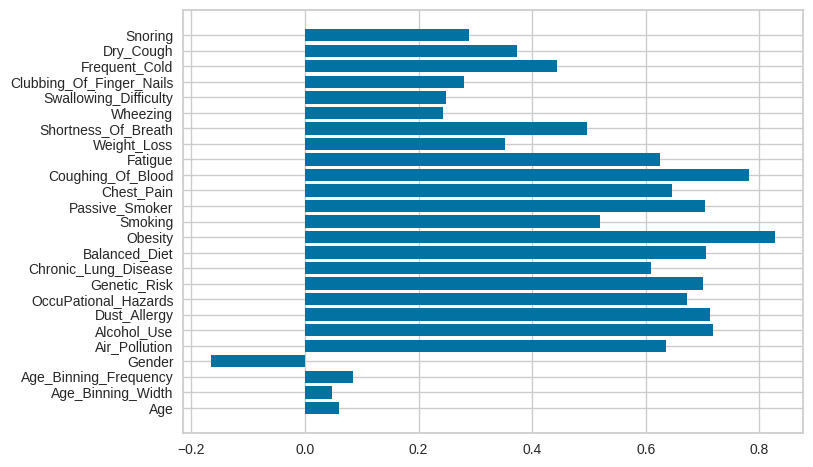

In [49]:
from yellowbrick.target import FeatureCorrelation

# Get all column names except for the last column (the target variable)
cols_except_last = df.iloc[:, :-1].columns

# Create the feature matrix X and the target vector y from the DataFrame
X, y = df[cols_except_last], df['Level']

# Instantiate the FeatureCorrelation visualizer with the column labels
visualizer = FeatureCorrelation(labels=cols_except_last)

# Fit the visualizer to the data
visualizer.fit(X, y)

In [ ]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [83]:
import random
from sklearn.model_selection import train_test_split

age_features = ['Age', 'Age_Binning_Width', 'Age_Binning_Frequency']
data_splits = {}
data_splits_with_replacement = {}

# Change the range to start from 5% training set and end with 60% training set
split_ratios = [(x, 80 - x) for x in range(5, 61, 5)]

# Split data into train-validation and test sets (80% and 20%) without stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df.drop('Level', axis=1), df['Level'], test_size=0.2, random_state=0, shuffle=True
)

for feature in age_features:
    # Initialize a nested dictionary for the feature
    data_splits[feature] = {}
    data_splits_with_replacement[feature] = {}
    
    for train_ratio, val_ratio in split_ratios:
        # Drop the other two age-related features
        other_features = [f for f in age_features if f != feature]
        X = X_train_val.drop(other_features, axis=1)
        y = y_train_val

        # Perform stratified train-validation split with varying ratios and shuffling
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=val_ratio/80, random_state=0, stratify=y, shuffle=True
        )

        # Perform bootstrapping and resampling on the training set
        bootstrap_indices = random.choices(range(len(X_train)), k=len(X_train))
        X_train_bootstrap = X_train.iloc[bootstrap_indices]
        y_train_bootstrap = y_train.iloc[bootstrap_indices]

        # Store the data splits without replacement
        data_splits[feature][(train_ratio, val_ratio, 20)] = {
            'X_train': X_train,
            'X_val': X_val,
            'X_test': X_test,
            'y_train': y_train,
            'y_val': y_val,
            'y_test': y_test
        }

        # Store the data splits with replacement (bootstrapped)
        data_splits_with_replacement[feature][(train_ratio, val_ratio, 20)] = {
            'X_train': X_train_bootstrap,
            'X_val': X_val,
            'X_test': X_test,
            'y_train': y_train_bootstrap,
            'y_val': y_val,
            'y_test': y_test
        }

# Examples on how to access portions of the dataset
# X_train_age = data_splits['Age'][(10, 70, 20)]['X_train']
# y_train_age = data_splits['Age'][(10, 70, 20)]['y_train']
# X_val_age_binning_width = data_splits['Age_Binning_Width'][(20, 60, 20)]['X_val']
# y_val_age_binning_width = data_splits['Age_Binning_Width'][(20, 60, 20)]['y_val']
# X_test_age_binning_frequency = data_splits['Age_Binning_Frequency'][(60, 20, 20)]['X_test']
# y_test_age_binning_frequency = data_splits['Age_Binning_Frequency'][(60, 20, 20)]['y_test']
# X_train_bootstrap_age = data_splits_with_replacement['Age'][(30, 50, 20)]['X_train']
# y_train_bootstrap_age = data_splits_with_replacement['Age'][(30, 50, 20)]['y_train']

In [ ]:
# age_features = ['Age', 'Age_Binning_Width', 'Age_Binning_Frequency']
# data_splits = {}
# split_ratios = [(x, 100-x) for x in range(5, 96, 5)]

# for feature in age_features:
#     # Initialize a nested dictionary for the feature
#     data_splits[feature] = {}
    
#     for train_ratio, test_ratio in split_ratios:
#         # Drop the other two age-related features
#         other_features = [f for f in age_features if f != feature]
#         X = df.drop(['Level'] + other_features, axis=1)
#         y = df['Level']

#         # Perform stratified train-test split with varying ratios and shuffling
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=test_ratio/100, random_state=0, stratify=y, shuffle=True
#         )

#         # To access the train-test splits for each feature and ratio:
#         # data_splits['Age'][(10, 90)]['X_train'], data_splits['Age'][(10, 90)]['X_test'], etc.
#         data_splits[feature][(train_ratio, test_ratio)] = {
#             'X_train': X_train,
#             'X_test': X_test,
#             'y_train': y_train,
#             'y_test': y_test
#         }

import random

age_features = ['Age', 'Age_Binning_Width', 'Age_Binning_Frequency']
data_splits = {}
data_splits_with_replacement = {}
split_ratios = [(x, 100-x) for x in range(5, 96, 5)]

for feature in age_features:
    # Initialize a nested dictionary for the feature
    data_splits[feature] = {}
    data_splits_with_replacement[feature] = {}
    
    for train_ratio, test_ratio in split_ratios:
        # Drop the other two age-related features
        other_features = [f for f in age_features if f != feature]
        X = df.drop(['Level'] + other_features, axis=1)
        y = df['Level']

        # Perform stratified train-test split with varying ratios and shuffling
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_ratio/100, random_state=0, stratify=y, shuffle=True
        )

        # Perform bootstrapping and resampling on the training set
        bootstrap_indices = random.choices(range(len(X_train)), k=len(X_train))
        X_train_bootstrap = X_train.iloc[bootstrap_indices]
        y_train_bootstrap = y_train.iloc[bootstrap_indices]

        # Store the data splits without replacement
        data_splits[feature][(train_ratio, test_ratio)] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

        # Store the data splits with replacement (bootstrapped)
        data_splits_with_replacement[feature][(train_ratio, test_ratio)] = {
            'X_train': X_train_bootstrap,
            'X_test': X_test,
            'y_train': y_train_bootstrap,
            'y_test': y_test
        }

In [ ]:
# def objective(trial, data_splits, age_feature, n_splits=5):
    # # Get binary mask for feature selection
    # binary_mask = trial.suggest_int("binary_mask", 0, 2 ** (len(df.columns) - 2) - 1)
    
    # # Convert binary mask to list of selected features
    # selected_features = [col for idx, col in enumerate(df.columns[:-1]) if binary_mask & (1 << idx)]
    # print(f"Trial {trial.number}: Selected features: {selected_features}")
    
    # features = list(selected_features) + [age_feature]

def objective(trial, data_splits, age_feature, n_splits=5):
    
    X_train, X_test, y_train, y_test = (
        data_splits[age_feature][(5, 95)]['X_train'],
        data_splits[age_feature][(5, 95)]['X_test'],
        data_splits[age_feature][(5, 95)]['y_train'],
        data_splits[age_feature][(5, 95)]['y_test'],
    )

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    macro_auc_scores = []
    weighted_auc_scores = []

    classifier_name = trial.suggest_categorical("classifier", ["RandomForest", "LogisticRegression", "KNeighbors", "SVC", "GaussianNB"])

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

        if classifier_name == "RandomForest":
            clf = RandomForestClassifier(n_estimators=100, random_state=0)
        elif classifier_name == "LogisticRegression":
            clf = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear', penalty='l1')
        elif classifier_name == "KNeighbors":
            clf = KNeighborsClassifier(n_neighbors=5)
        elif classifier_name == "SVC":
            clf = SVC(kernel='linear', probability=True, random_state=0, decision_function_shape='ovr')
        elif classifier_name == "GaussianNB":
            clf = GaussianNB()
        else:
            raise ValueError("Invalid classifier name")

        clf.fit(X_train_cv, y_train_cv)

        y_pred_proba = clf.predict_proba(X_val_cv)

        macro_auc = roc_auc_score(y_val_cv, y_pred_proba, multi_class="ovr", average="macro")
        weighted_auc = roc_auc_score(y_val_cv, y_pred_proba, multi_class="ovr", average="weighted")

        macro_auc_scores.append(macro_auc)
        weighted_auc_scores.append(weighted_auc)

    # Return the average of macro and weighted AUC-ROC scores across all folds
    return np.mean(macro_auc_scores + weighted_auc_scores)

In [ ]:
study = optuna.create_study(direction="maximize")

# One of the age feature in ['Age', 'Age_Binning_Width', 'Age_Binning_Frequency']
age_feature = 'Age'

study.optimize(lambda trial: objective(trial, data_splits, age_feature, n_splits=2), n_trials=100)

print("Best trial:")
trial = study.best_trial
print("  Value: {:.3f}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
import optuna.visualization as ovis

# Plot optimization history
ovis.plot_optimization_history(study)
# ovis.plot_param_importances(study)

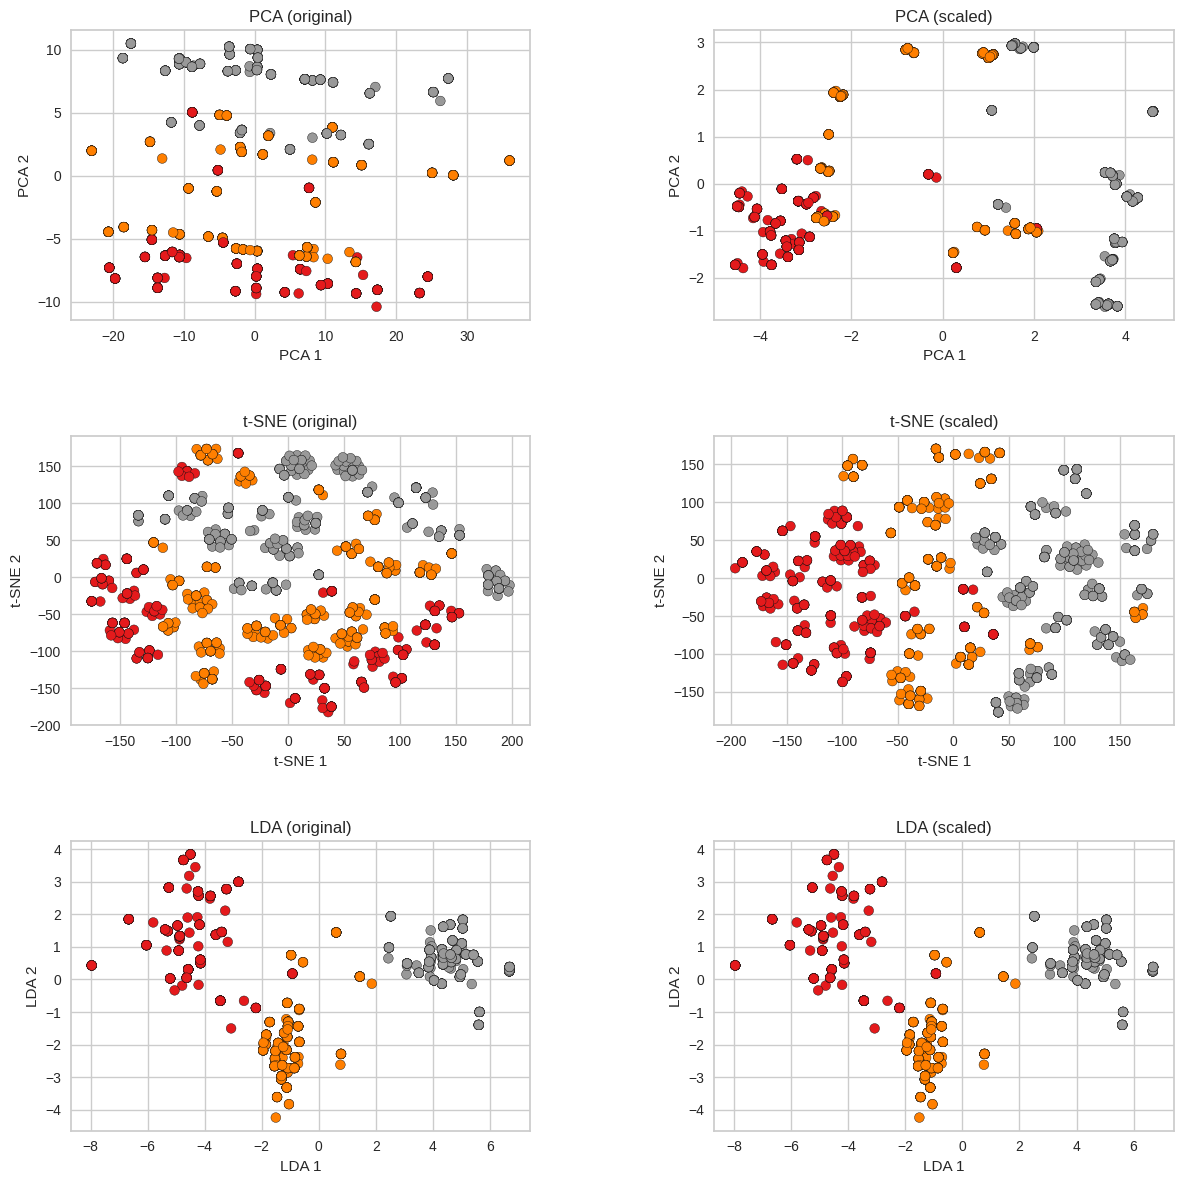

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def plot_dimensionality_reduction(df, age_feature, train_ratio, n_dimensions=2):
    methods = ['PCA', 't-SNE', 'LDA']
    versions = ['original', 'scaled']

    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    # Create a loop to iterate over the methods and data versions
    for idx, method in enumerate(methods):
        for j, version in enumerate(versions):
            if isinstance(df, dict):
                X = data_splits[age_feature][(train_ratio, 100-train_ratio)]['X_train']
                y = data_splits[age_feature][(train_ratio, 100-train_ratio)]['y_train']
            else:
                other_features = [f for f in age_features if f != age_feature]
                X = df.drop(['Level'] + other_features, axis=1)
                y = df['Level']

            if version == 'scaled':
                scaler = StandardScaler()
                X = scaler.fit_transform(X)

            if method == 'PCA':
                dr = PCA(n_components=n_dimensions)
            elif method == 't-SNE':
                dr = TSNE(n_components=n_dimensions)
            elif method == 'LDA':
                dr = LinearDiscriminantAnalysis(n_components=n_dimensions)

            X_reduced = dr.fit_transform(X, y)

            ax = axes[idx, j]
            ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
            ax.set_xlabel(f'{method} 1')
            ax.set_ylabel(f'{method} 2')
            ax.set_title(f'{method} ({version})')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()


plot_dimensionality_reduction(df, 'Age', 90, n_dimensions=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

def plot_importances(model, data_source, age_feature, train_ratio, test_ratio, model_name, importance_type="feature", threshold=0.05):
    X_train = data_source[age_feature][(train_ratio, test_ratio)]['X_train']
    y_train = data_source[age_feature][(train_ratio, test_ratio)]['y_train']
    X_test = data_source[age_feature][(train_ratio, test_ratio)]['X_test']
    y_test = data_source[age_feature][(train_ratio, test_ratio)]['y_test']

    model.fit(X_train, y_train)
    
    if importance_type == "feature":
        importances = model.feature_importances_
        try:
            std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
        except AttributeError:
            std = np.zeros(len(importances))
    elif importance_type == "permutation":
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
        importances = result.importances_mean
        std = result.importances_std
    
    importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
    importance_df = importance_df.sort_values('importance', ascending=False)

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.barh(importance_df['feature'], importance_df['importance'], xerr=importance_df['std'])
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')
    ax.set_title(f'{model_name} {importance_type.capitalize()} Importances')

    ax.axvline(x=threshold, color='red', linestyle='--')

    plt.gca().invert_yaxis()
    plt.yticks(importance_df['feature'][importance_df['importance'] > threshold])
    plt.tight_layout()
    plt.show()
    
    # Return the selected features and their importance values
    selected_features = importance_df[importance_df['importance'] > threshold]
    return model_name, selected_features

def plot_summary(selected_features_list):
    summary_df = pd.concat([df[['feature', 'importance']].set_index('feature') for _, df in selected_features_list], axis=1, keys=[name for name, _ in selected_features_list])
    # summary_df.columns = summary_df.columns.map('|'.join)
    summary_df = summary_df.reset_index().melt(id_vars='feature', var_name='model', value_name='importance')
    summary_df = summary_df.dropna(subset=['importance'])

    fig, ax = plt.subplots()
    sns.barplot(data=summary_df, x='feature', y='importance', hue='model', ax=ax)
    ax.set_title("Feature Importances Summary")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


models_feature_importance = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=0)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=0)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, random_state=0, eval_metric="logloss"))
]

models_permutation_importance = [
    ("Logistic Regression", LogisticRegression(random_state=0, multi_class='ovr')),
    ("SVM", SVC(kernel='linear', random_state=0, decision_function_shape='ovr'))
]


train_ratio, test_ratio = 80, 20
age_feature = 'Age'
# data_source = data_splits
data_source = data_splits_with_replacement
# Manually input a subset of features you want to try
selected_features_list = []

for model_name, model in models_feature_importance + models_permutation_importance:
    if model_name in [name for name, _ in models_feature_importance]:
        selected_features_list.append(plot_importances(model, data_source, age_feature, train_ratio, test_ratio, model_name, importance_type="feature"))
    else:
        selected_features_list.append(plot_importances(model, data_source, age_feature, train_ratio, test_ratio, model_name, importance_type="permutation"))

plot_summary(selected_features_list)

In [ ]:
df.columns


Index(['Air_Pollution', 'Alcohol_Use', 'Dust_Allergy', 'OccuPational_Hazards',
       'Genetic_Risk', 'Chronic_Lung_Disease', 'Balanced_Diet', 'Obesity',
       'Smoking', 'Passive_Smoker', 'Coughing_Of_Blood',
       'Fatigue', 'Weight_Loss', 'Wheezing',
       'Swallowing_Difficulty', 'Clubbing_Of_Finger_Nails', 'Snoring'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

def run_classifier(classifier, df, age_feature, split_ratios, selected_features=None, n_splits=5):
    results = {}
    
    for train_ratio, test_ratio in split_ratios:
        X_train, X_test, y_train, y_test = (
            df[age_feature][(train_ratio, test_ratio)]['X_train'],
            df[age_feature][(train_ratio, test_ratio)]['X_test'],
            df[age_feature][(train_ratio, test_ratio)]['y_train'],
            df[age_feature][(train_ratio, test_ratio)]['y_test'],
        )

        if selected_features is not None:
            X_train = X_train[selected_features]
            X_test = X_test[selected_features]

        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
        macro_auc_scores = []
        weighted_auc_scores = []
        log_losses = []
        accuracies = []
        confusion_matrices = []

        for train_index, val_index in cv.split(X_train, y_train):
            X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

            clf = classifier()
            clf.fit(X_train_cv, y_train_cv)

            y_pred_proba = clf.predict_proba(X_val_cv)
            y_pred = clf.predict(X_val_cv)

            macro_auc = roc_auc_score(y_val_cv, y_pred_proba, multi_class="ovr", average="macro")
            weighted_auc = roc_auc_score(y_val_cv, y_pred_proba, multi_class="ovr", average="weighted")
            log_loss_val = log_loss(y_val_cv, y_pred_proba)
            accuracy = accuracy_score(y_val_cv, y_pred)
            cm = confusion_matrix(y_val_cv, y_pred)

            macro_auc_scores.append(macro_auc)
            weighted_auc_scores.append(weighted_auc)
            log_losses.append(log_loss_val)
            accuracies.append(accuracy)
            confusion_matrices.append(cm)

        results[(train_ratio, test_ratio)] = {
            'macro_auc': np.mean(macro_auc_scores),
            'weighted_auc': np.mean(weighted_auc_scores),
            'log_loss': np.mean(log_losses),
            'accuracy': np.mean(accuracies),
            'confusion_matrices': confusion_matrices
        }
    
    return results


split_ratios = [(x, 100-x) for x in range(5, 96, 5)]
classifiers = {
    "RandomForest": lambda: RandomForestClassifier(n_estimators=100, random_state=0),
    "LogisticRegression": lambda: LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear', penalty='l1'),
    "KNeighbors": lambda: KNeighborsClassifier(n_neighbors=5),
    "SVC": lambda: SVC(kernel='linear', probability=True, random_state=0, decision_function_shape='ovr'),
    "GaussianNB": lambda: GaussianNB()
}


age_feature = 'Age'
# selected_features = ['Feature1', 'Feature2', 'Feature3']
all_results = {}
all_results_with_replacement = {}
for classifier_name, classifier in classifiers.items():
    results = run_classifier(classifier, data_splits, age_feature, split_ratios, selected_features=selected_features)
    all_results[classifier_name] = results
    print(f"{classifier_name} Confusion Matrices:")
    for idx, cm in enumerate(results[(80, 20)]['confusion_matrices']):
        print(f"Fold {idx+1}:")
        print(cm)
        print()

In [ ]:
def plot_results(results, split_ratios, metric='macro_auc'):
    n_algorithms = len(results)
    fig, axes = plt.subplots(n_algorithms + 1, 1, figsize=(10, 5 * (n_algorithms + 1)), sharex=True)
    
    # Plot each algorithm vs different data sizes
    for i, (algorithm, algorithm_results) in enumerate(results.items()):
        x = [f"{train}-{test}" for train, test in split_ratios]
        y = [algorithm_results[ratio][metric] for ratio in split_ratios]
        
        axes[i].plot(x, y, marker='o')
        axes[i].set_title(f"{algorithm} - {metric}")
        axes[i].set_ylabel(metric)
    
    # Plot a summary showing all algorithms vs all data sizes
    for algorithm, algorithm_results in results.items():
        y = [algorithm_results[ratio][metric] for ratio in split_ratios]
        axes[-1].plot(x, y, marker='o', label=algorithm)
        
    axes[-1].set_title(f"Summary - {metric}")
    axes[-1].set_ylabel(metric)
    axes[-1].legend()
    
    # Set common x-axis label
    fig.text(0.5, 0.04, 'Train-Test Split Ratios', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(all_results, split_ratios, metric='macro_auc')
plot_results(all_results, split_ratios, metric='weighted_auc')
plot_results(all_results, split_ratios, metric='log_loss')

In [80]:
plot_results(all_results_with_replacement, split_ratios, metric='macro_auc')
plot_results(all_results_with_replacement, split_ratios, metric='weighted_auc')
plot_results(all_results_with_replacement, split_ratios, metric='log_loss')

NameError: ignored